In [5]:
# 必要なライブラリを読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [6]:
# データをインポート
data = pd.read_csv('train.csv')
data.head()

id  age           job  marital  education default  balance housing loan  \
0   1   39   blue-collar  married  secondary      no     1756     yes   no   
1   2   51  entrepreneur  married    primary      no     1443      no   no   
2   3   36    management   single   tertiary      no      436      no   no   
3   4   63       retired  married  secondary      no      474      no   no   
4   5   31    management   single   tertiary      no      354      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome  y  
0  cellular    3   apr       939         1     -1         0  unknown  1  
1  cellular   18   feb       172        10     -1         0  unknown  1  
2  cellular   13   apr       567         1    595         2  failure  1  
3  cellular   25   jan       423         1     -1         0  unknown  1  
4  cellular   30   apr       502         1      9         2  success  1

In [3]:
data.describe()

id           age        balance           day      duration  \
count  27128.000000  27128.000000   27128.000000  27128.000000  27128.000000   
mean   13564.500000     40.951010    1355.800870     15.806215    260.711295   
std     7831.323388     10.608542    3003.305272      8.337904    260.091727   
min        1.000000     18.000000   -6847.000000      1.000000      0.000000   
25%     6782.750000     33.000000      72.000000      8.000000    104.000000   
50%    13564.500000     39.000000     449.000000     16.000000    182.000000   
75%    20346.250000     48.000000    1428.000000     21.000000    323.000000   
max    27128.000000     95.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous             y  
count  27128.000000  27128.000000  27128.000000  27128.000000  
mean       2.751769     40.528052      0.579733      0.117001  
std        3.126594    100.382462      2.503653      0.321427  
min        1.000000     -1.000000      0.000000      0.000000  
25%        1.000000     -1.000000      0.000000      0.000000  
50%        2.000000     -1.000000      0.000000      0.000000  
75%        3.000000     -1.000000      0.000000      0.000000  
max       63.000000    871.000000    275.000000      1.000000

In [4]:
len(data)

27128

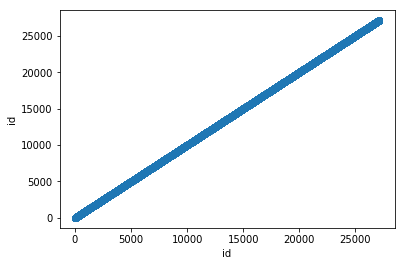

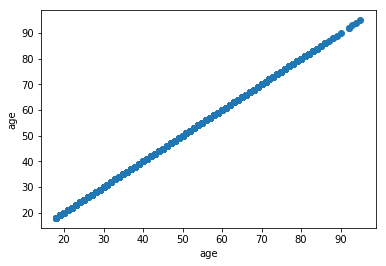

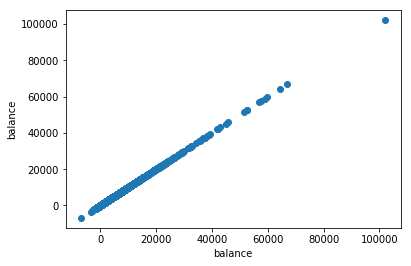

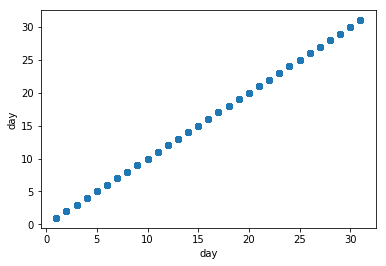

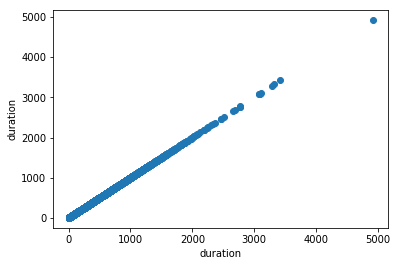

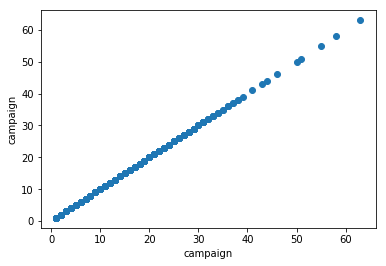

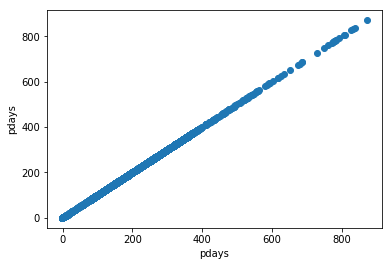

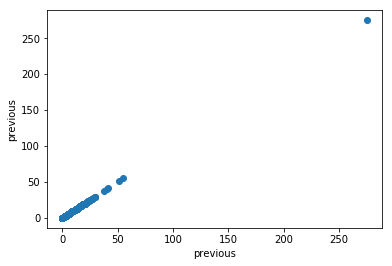

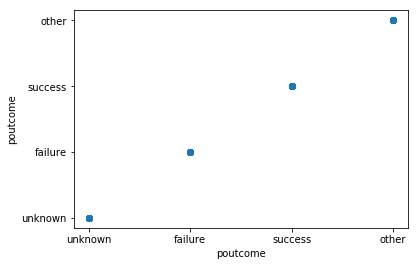

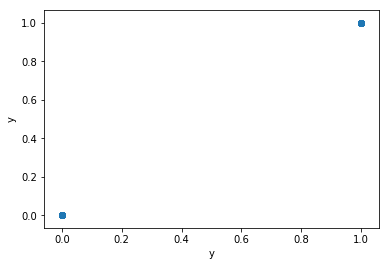

In [7]:
#散布図
columns=['id', 'age',  'balance', 'day',  'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y']
for name1 in columns:
    x = data[name1]
    for name2 in columns:
        y = data[name2]
        if name1 == name2:
            plt.scatter(x,y)
            plt.xlabel(name1)
            plt.ylabel(name2)
            plt.show()

In [44]:
data.head()

id  age           job  marital  education default  balance housing loan  \
0   1   39   blue-collar  married  secondary      no     1756     yes   no   
1   2   51  entrepreneur  married    primary      no     1443      no   no   
2   3   36    management   single   tertiary      no      436      no   no   
3   4   63       retired  married  secondary      no      474      no   no   
4   5   31    management   single   tertiary      no      354      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome  y  
0  cellular    3   apr       939         1     -1         0  unknown  1  
1  cellular   18   feb       172        10     -1         0  unknown  1  
2  cellular   13   apr       567         1    595         2  failure  1  
3  cellular   25   jan       423         1     -1         0  unknown  1  
4  cellular   30   apr       502         1      9         2  success  1

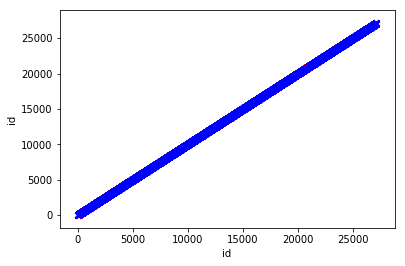

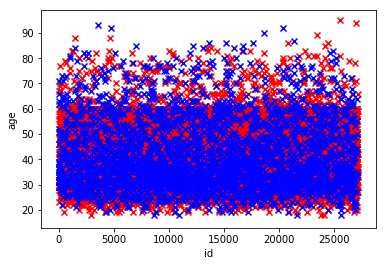

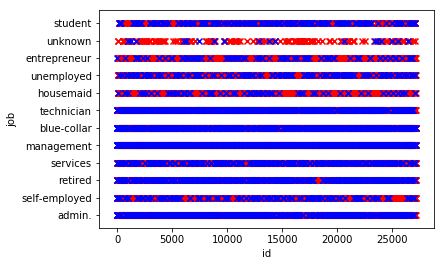

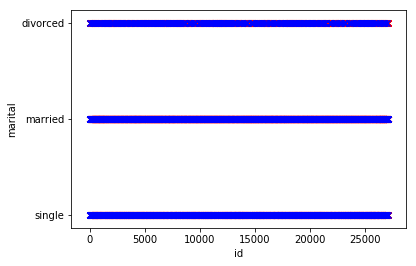

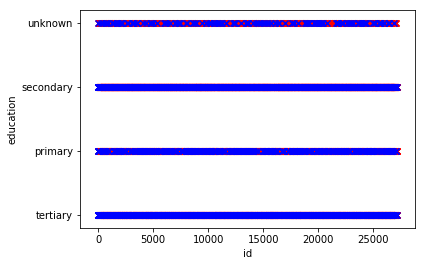

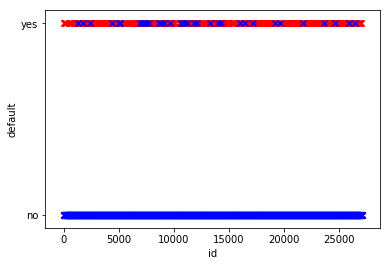

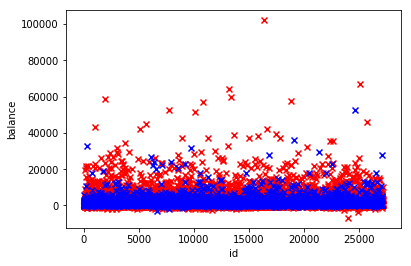

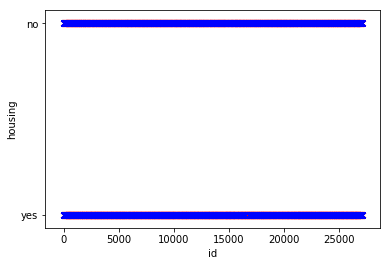

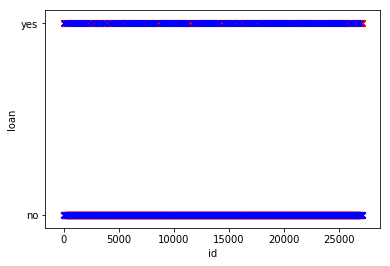

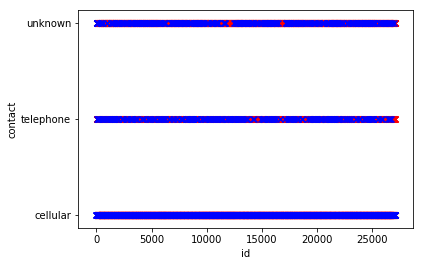

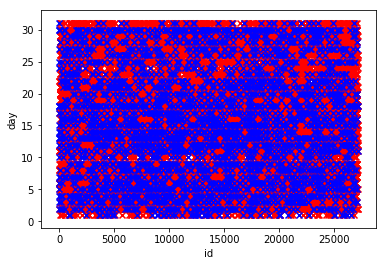

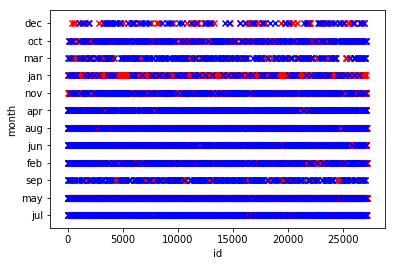

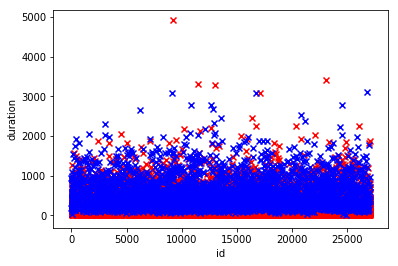

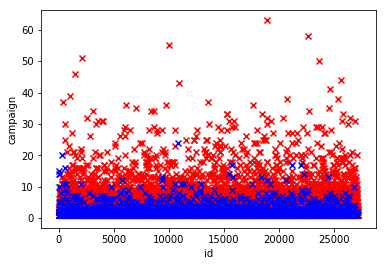

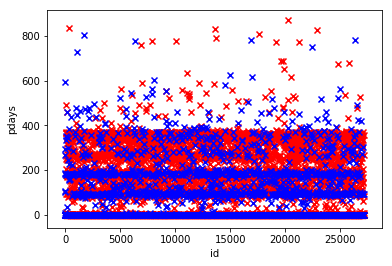

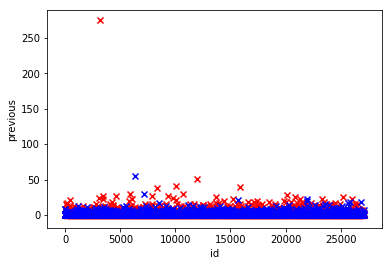

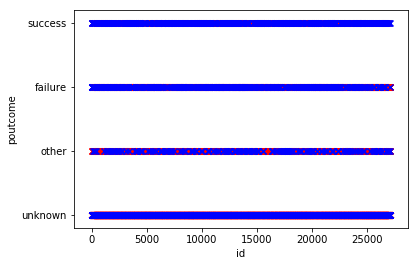

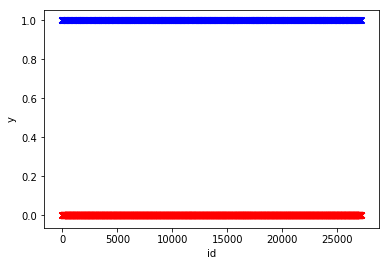

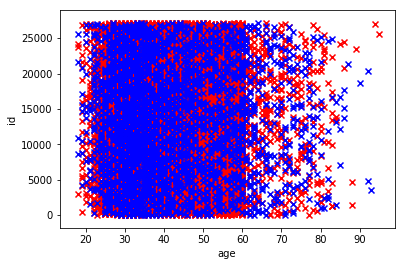

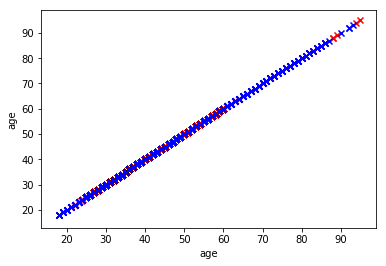

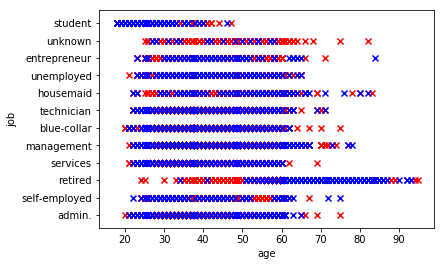

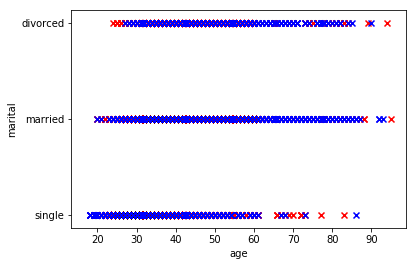

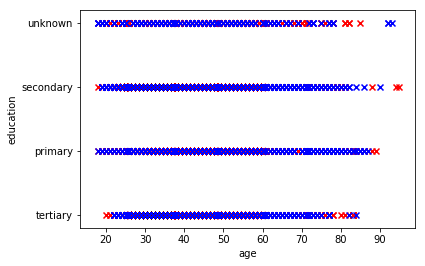

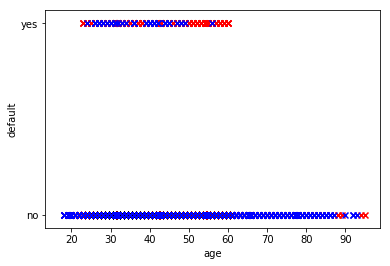

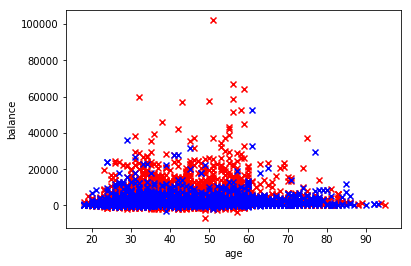

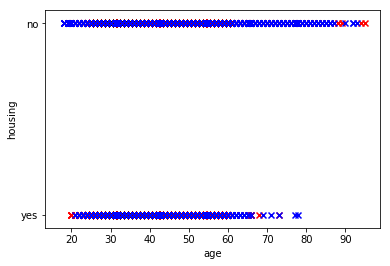

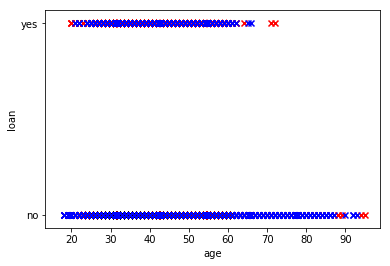

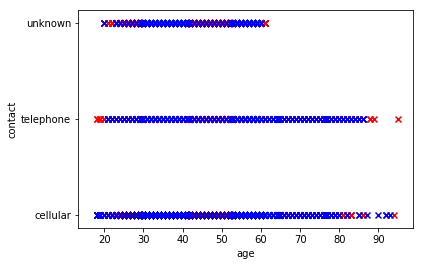

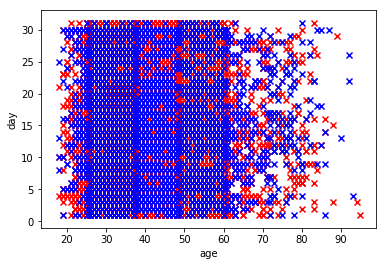

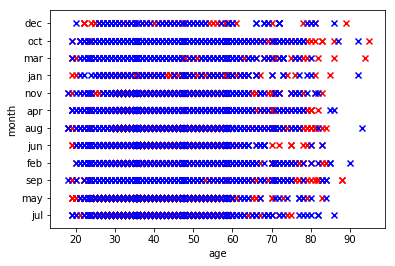

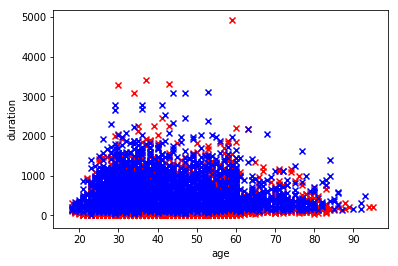

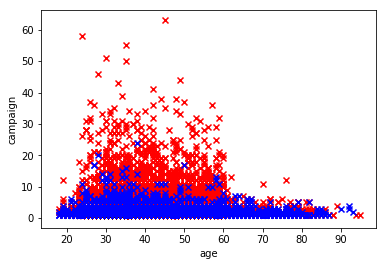

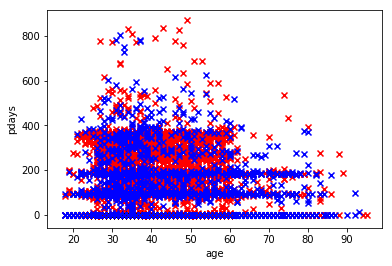

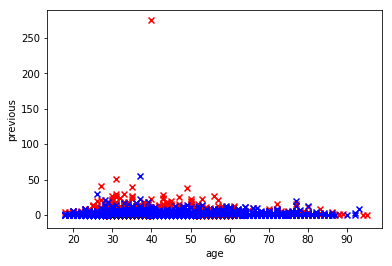

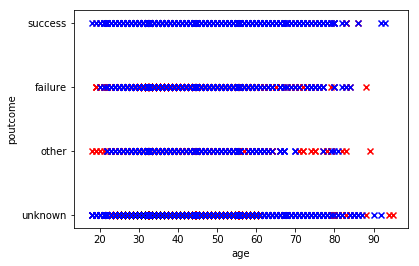

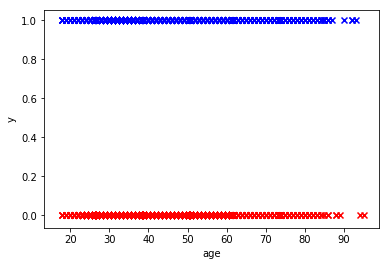

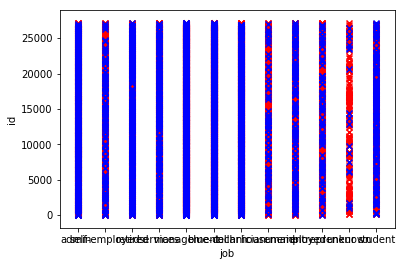

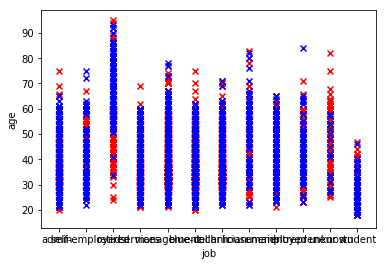

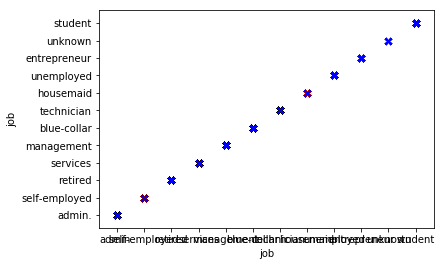

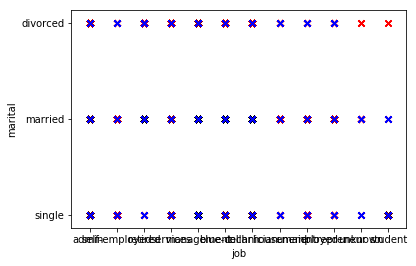

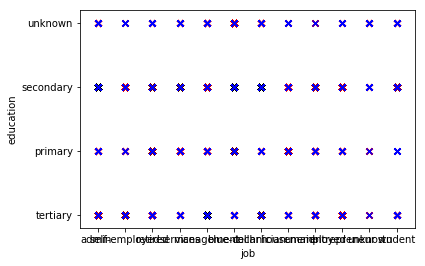

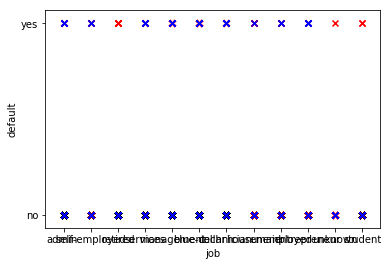

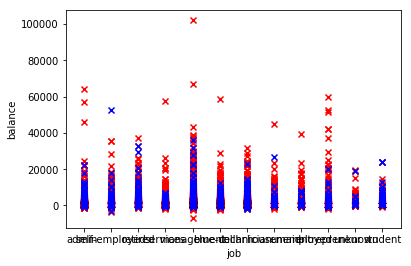

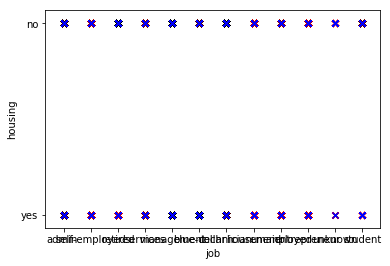

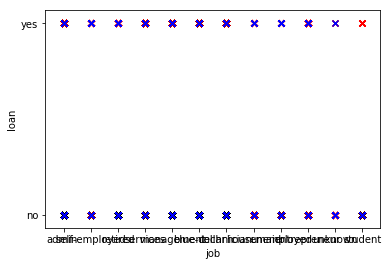

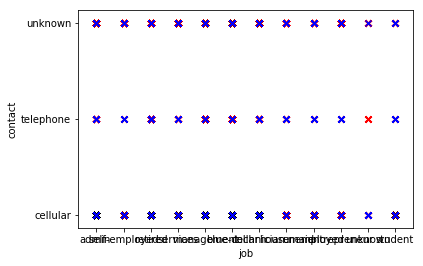

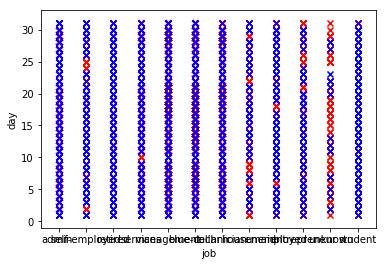

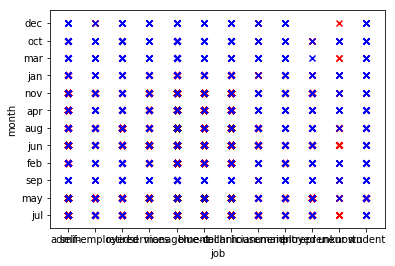

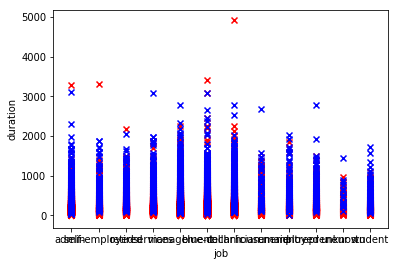

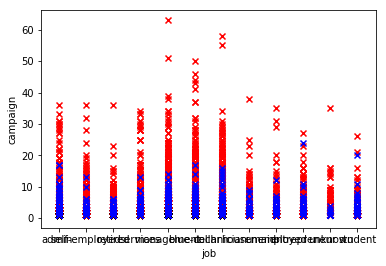

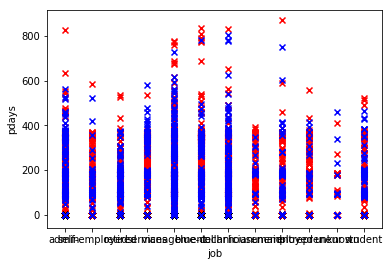

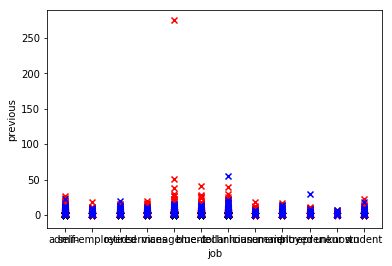

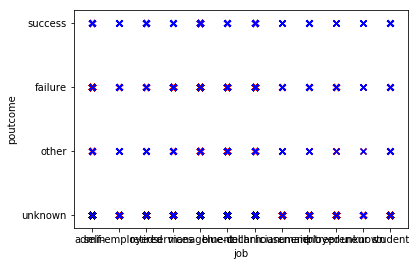

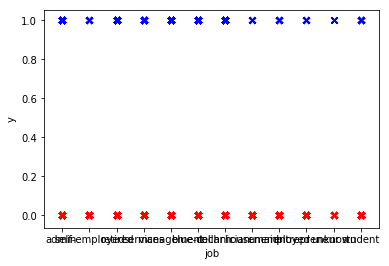

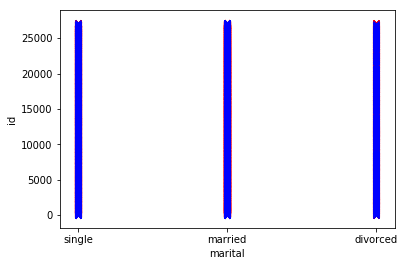

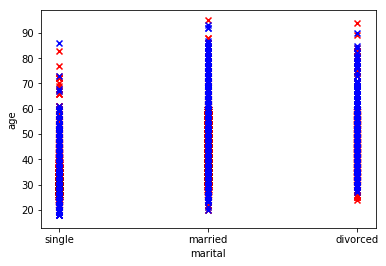

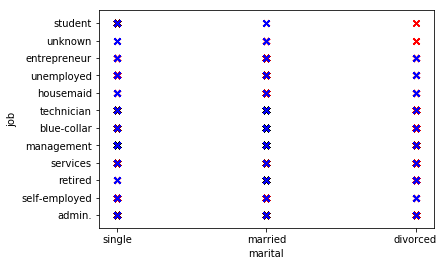

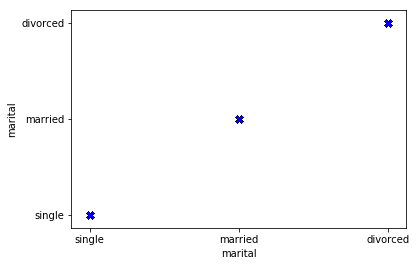

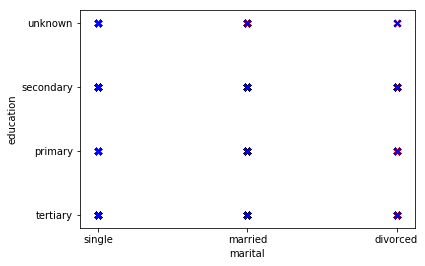

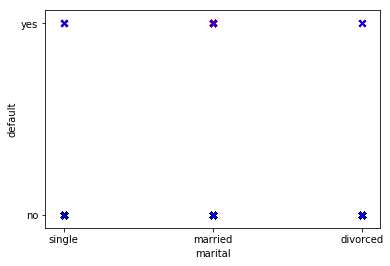

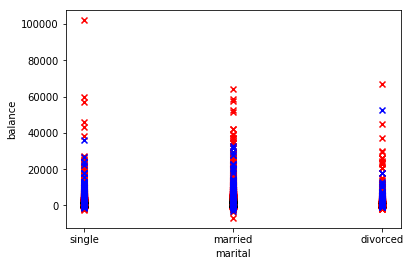

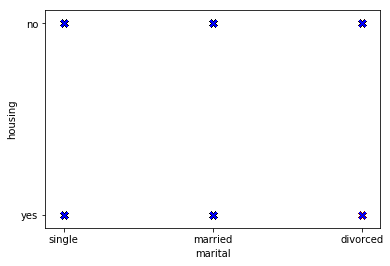

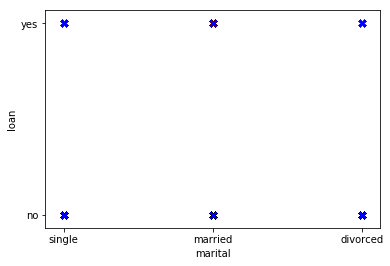

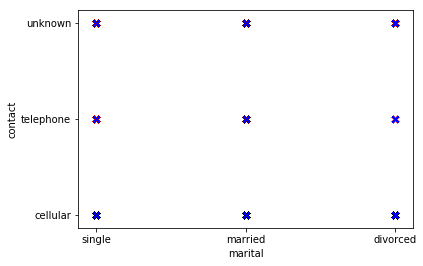

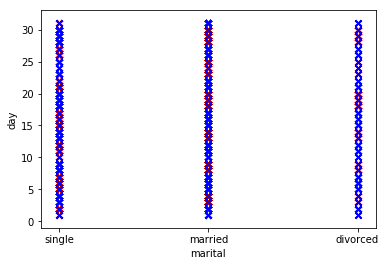

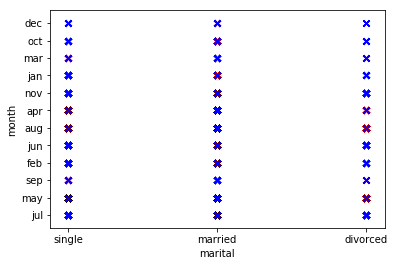

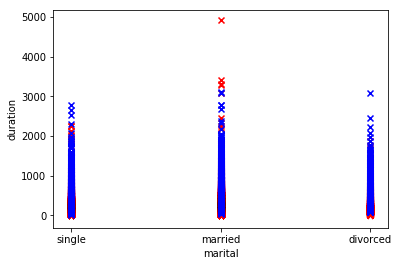

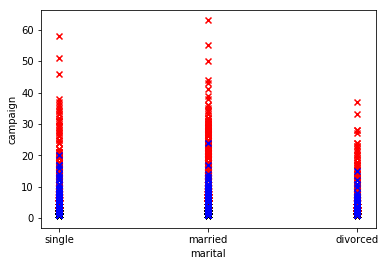

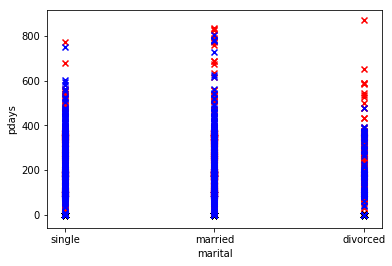

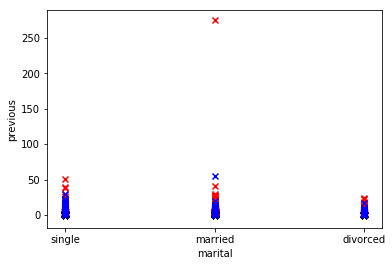

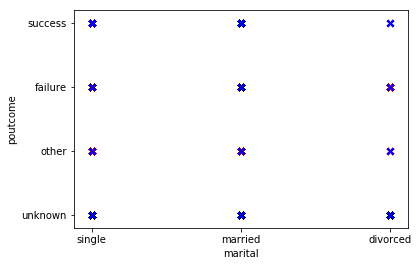

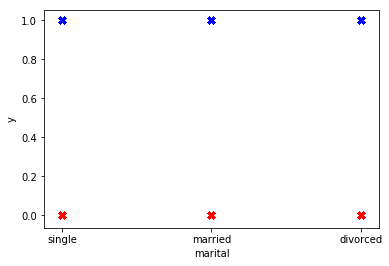

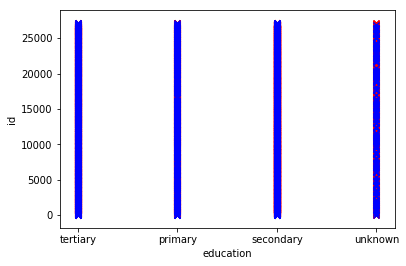

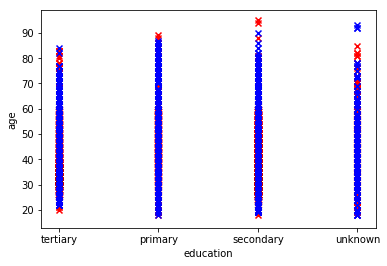

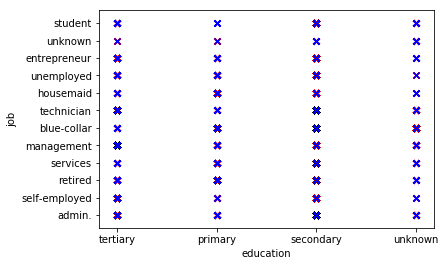

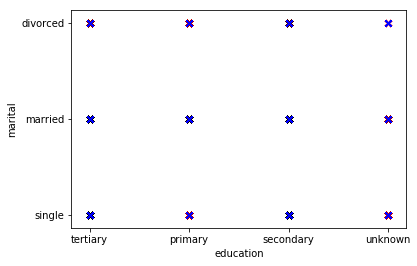

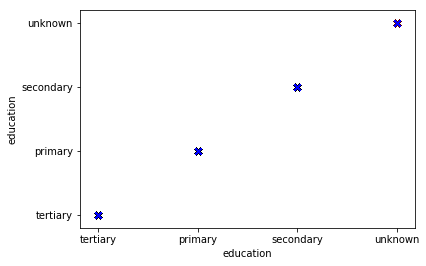

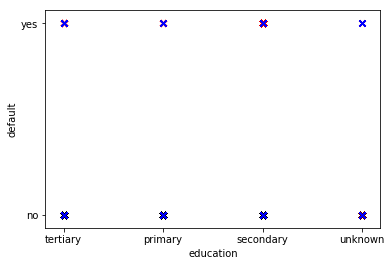

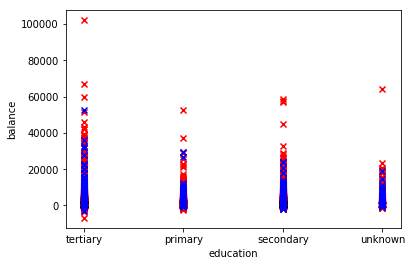

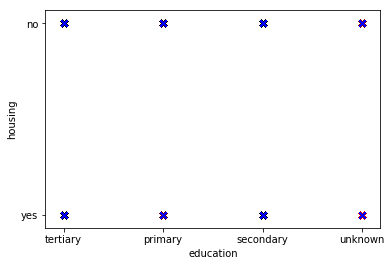

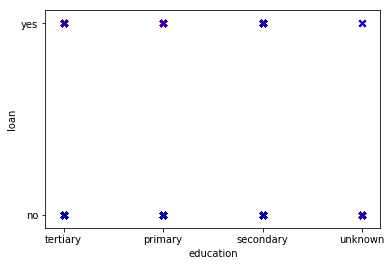

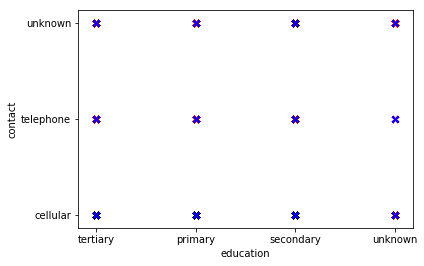

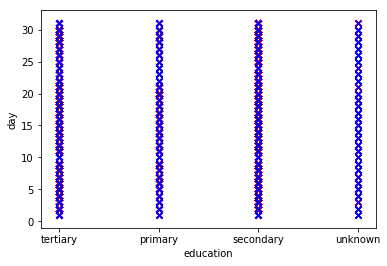

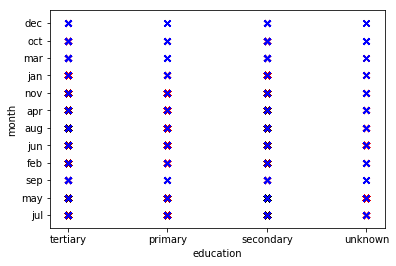

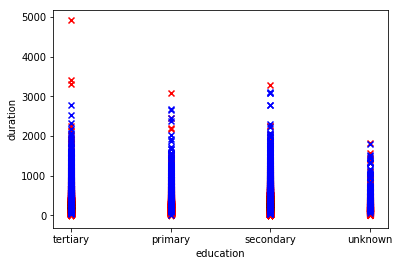

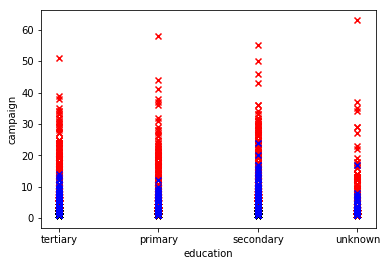

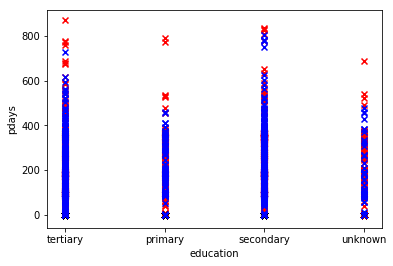

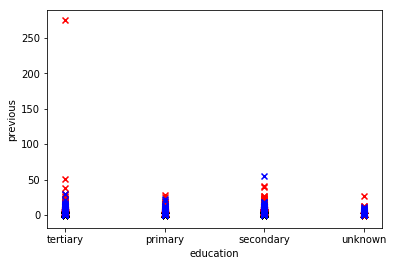

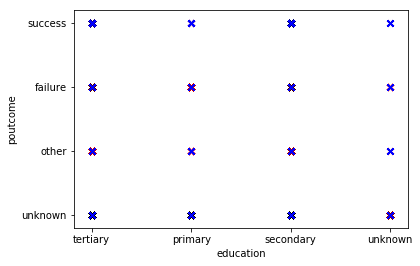

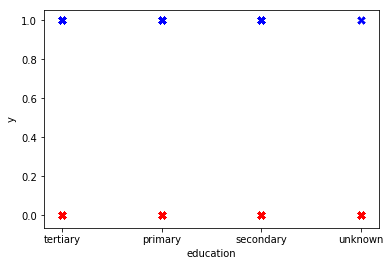

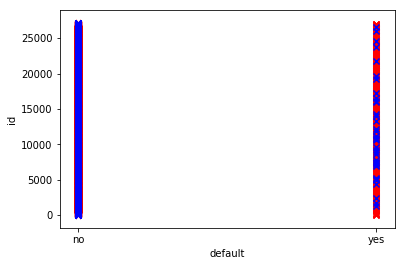

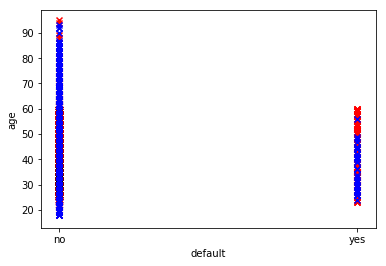

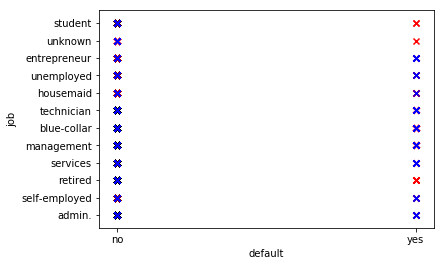

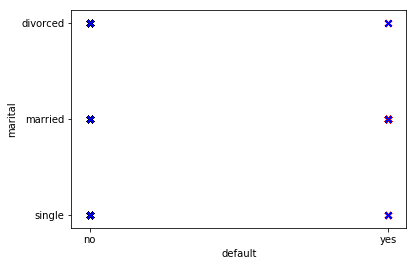

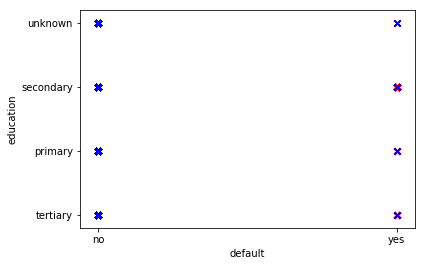

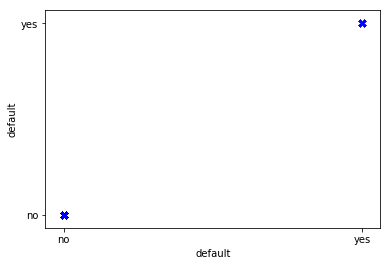

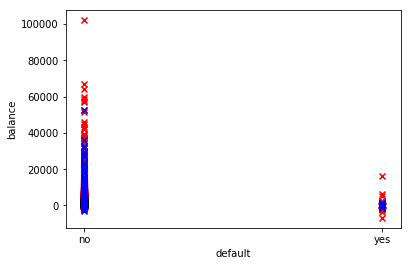

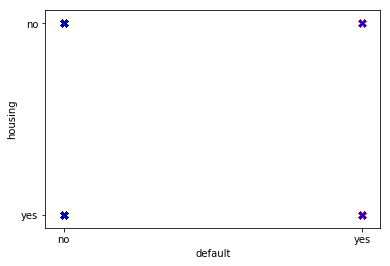

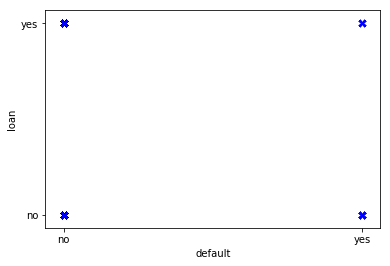

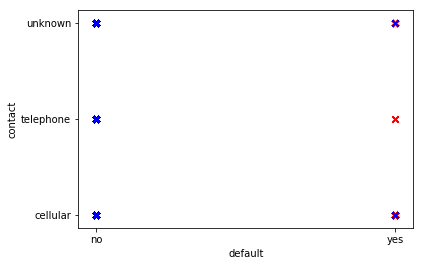

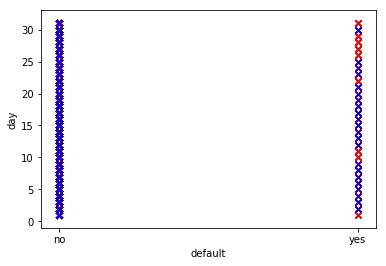

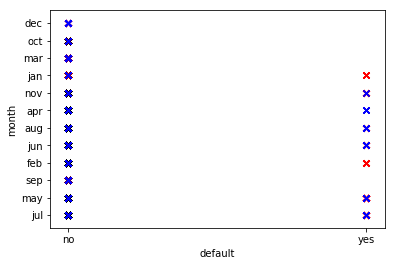

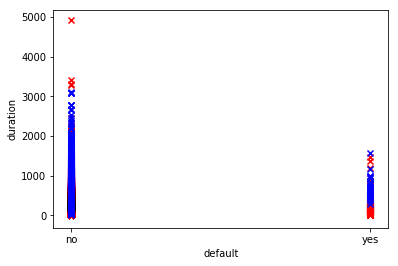

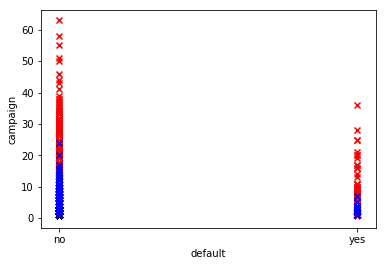

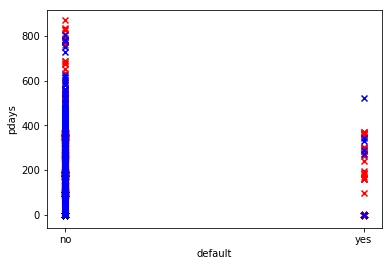

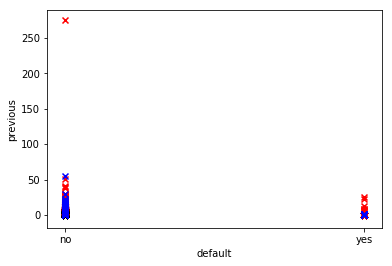

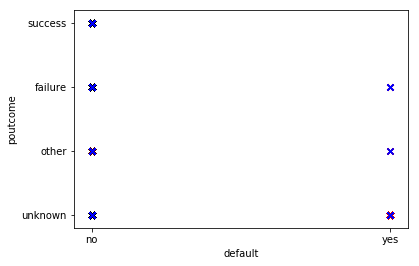

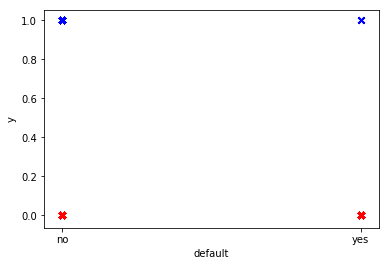

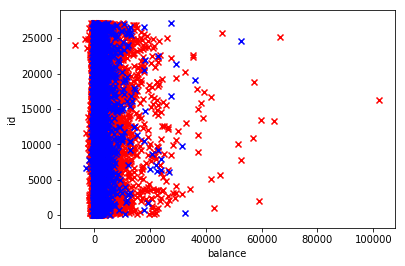

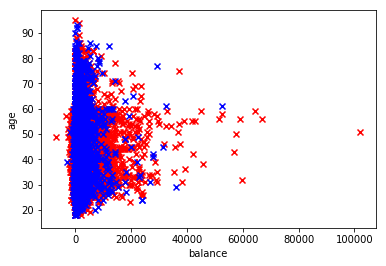

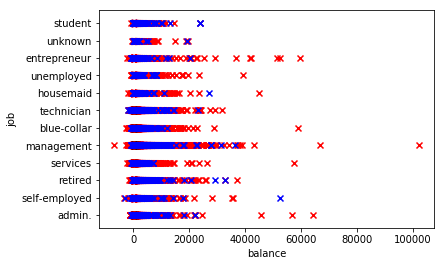

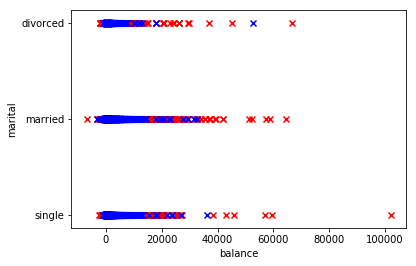

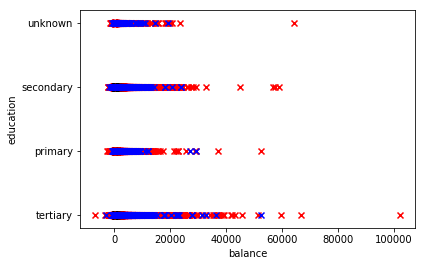

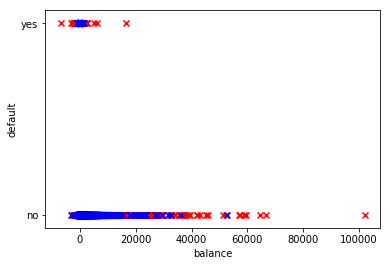

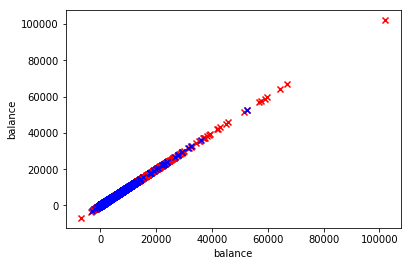

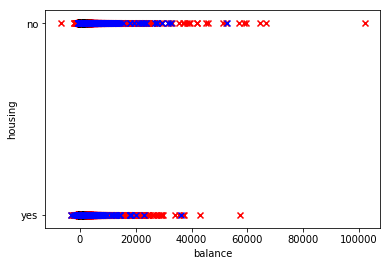

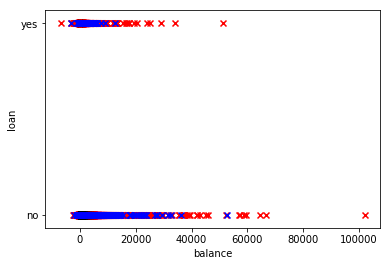

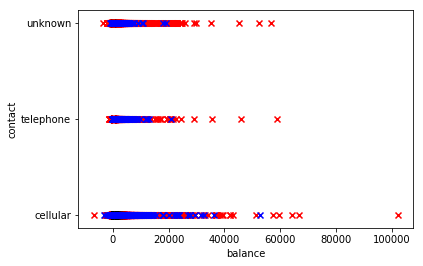

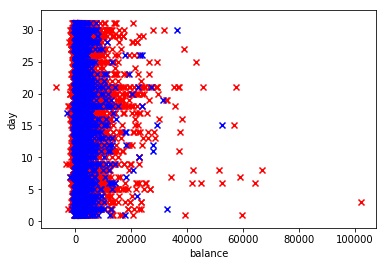

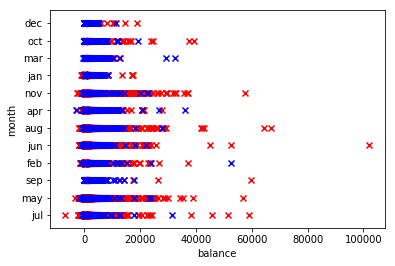

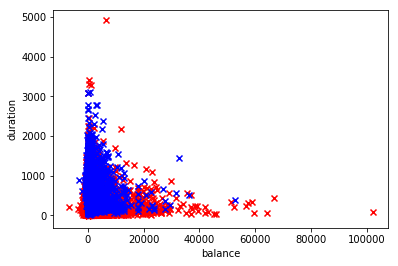

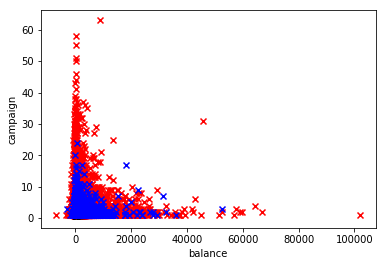

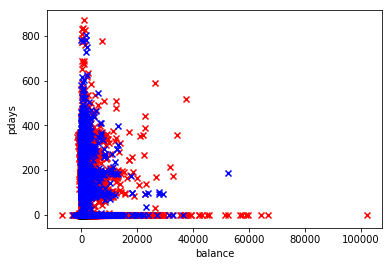

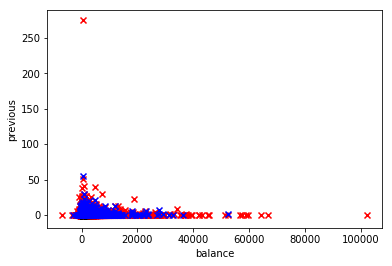

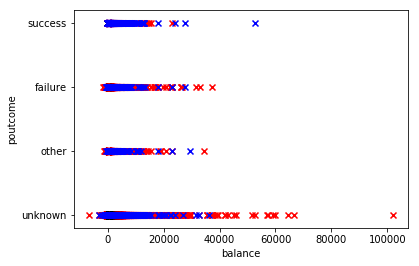

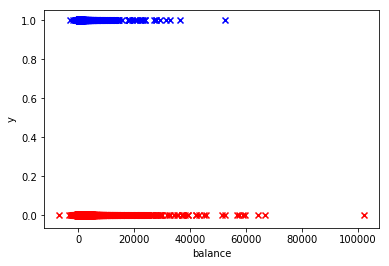

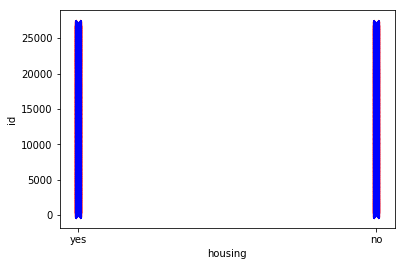

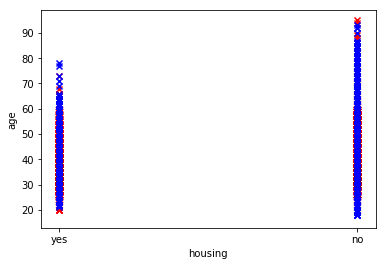

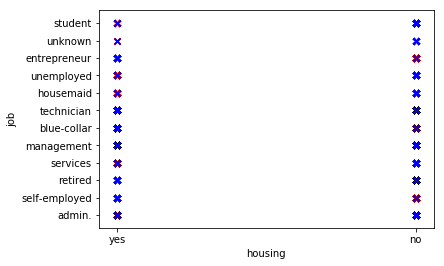

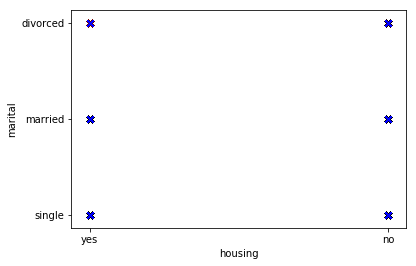

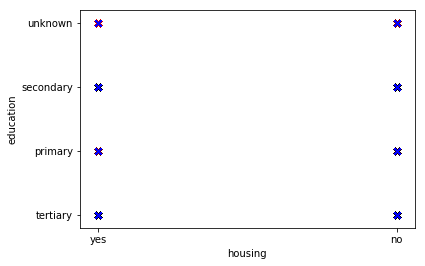

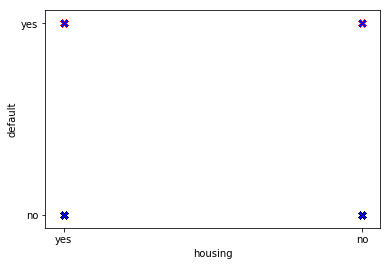

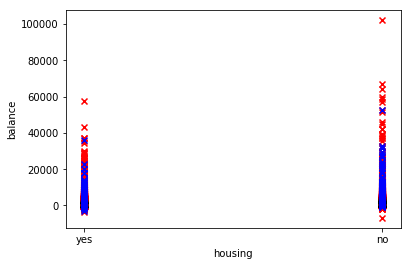

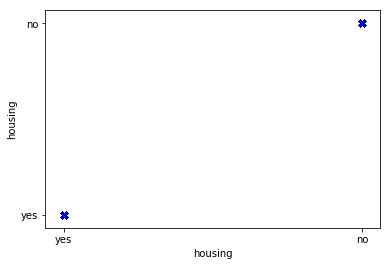

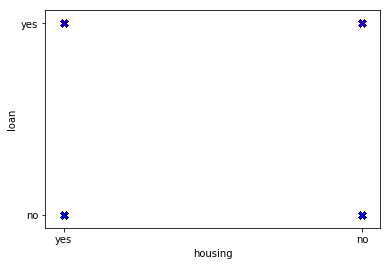

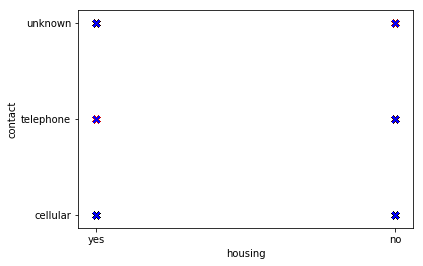

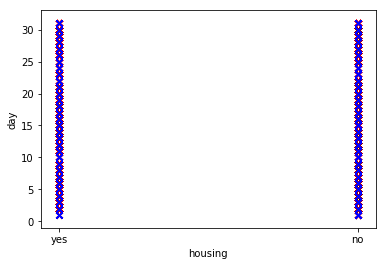

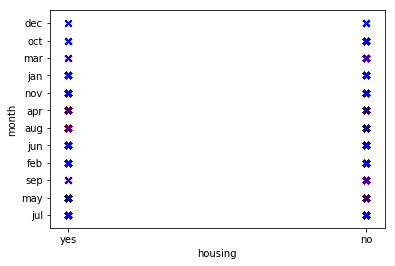

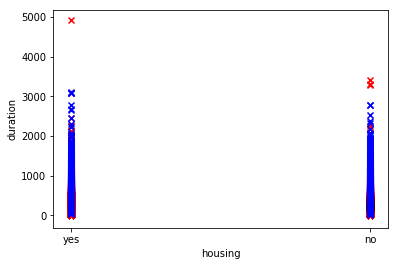

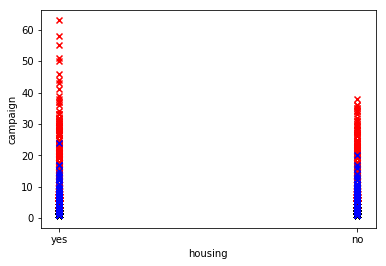

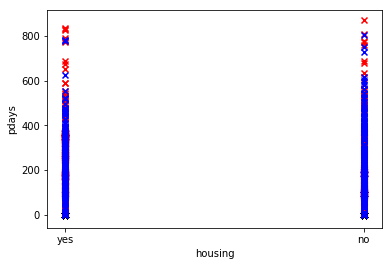

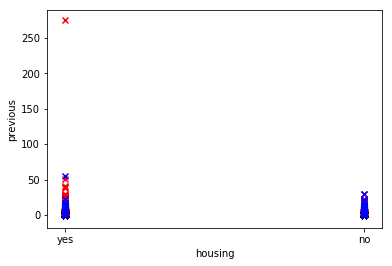

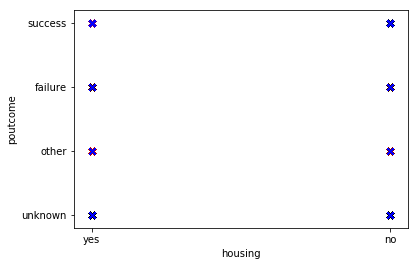

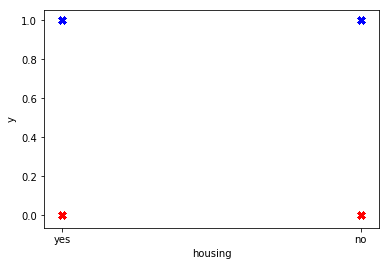

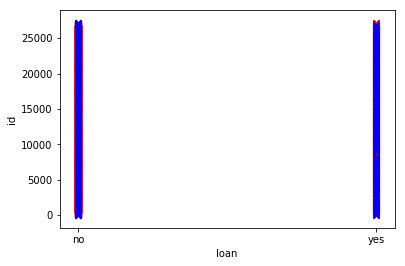

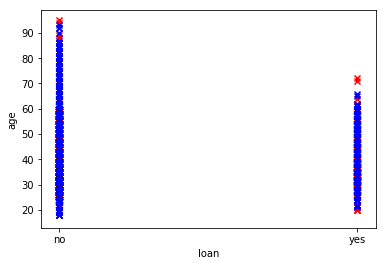

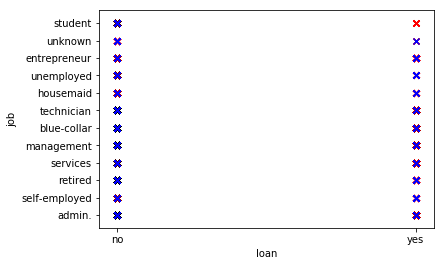

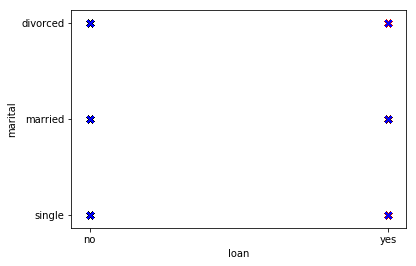

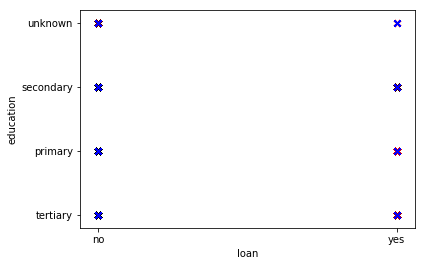

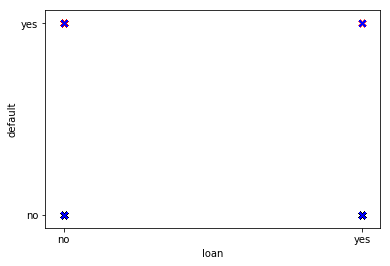

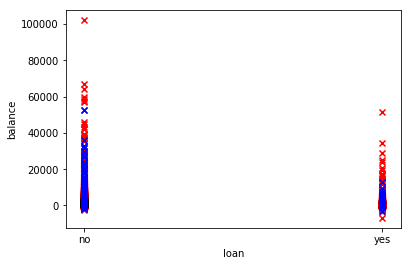

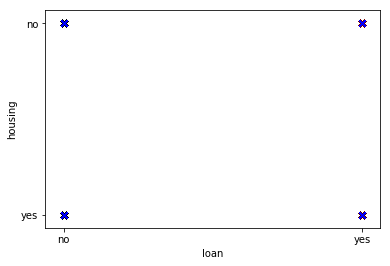

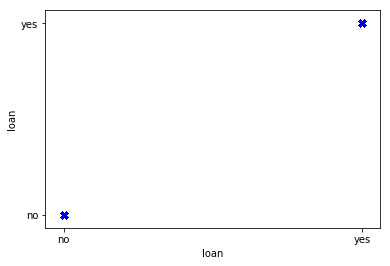

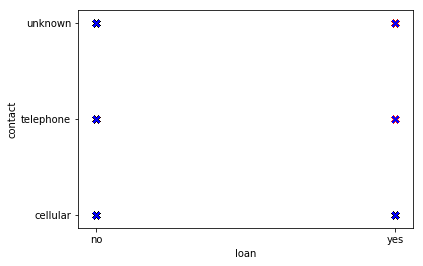

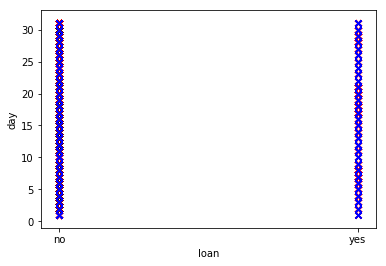

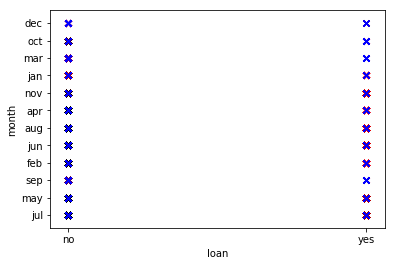

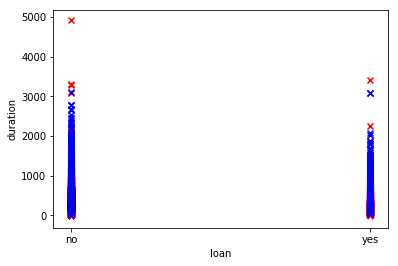

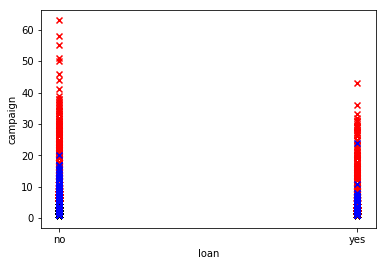

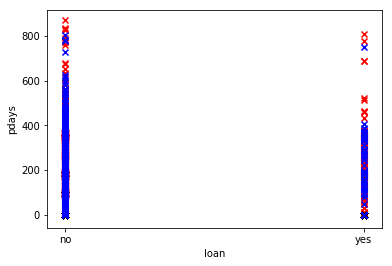

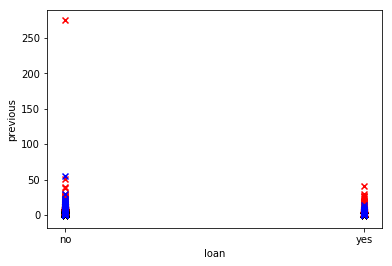

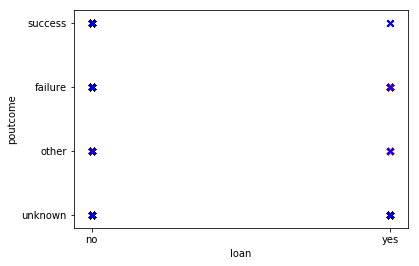

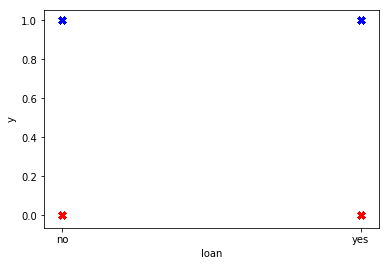

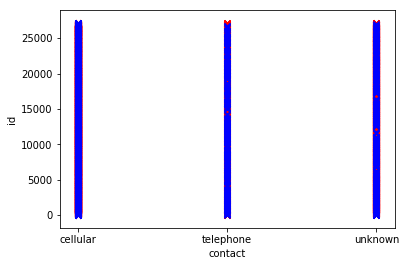

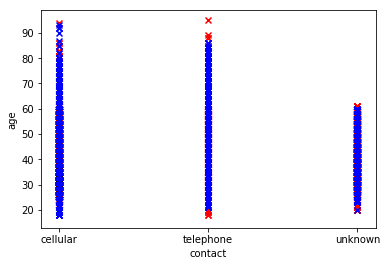

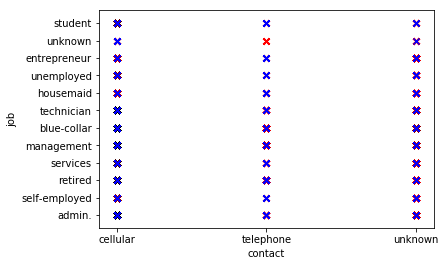

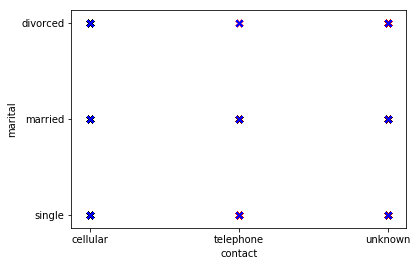

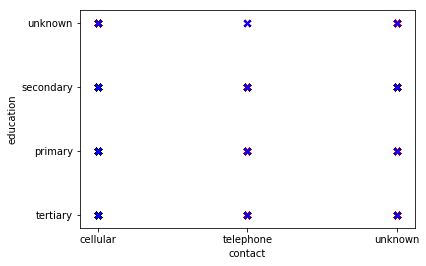

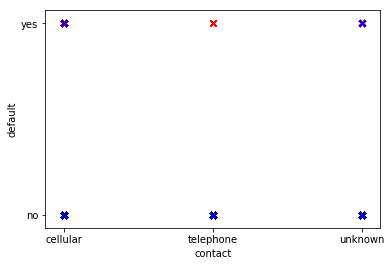

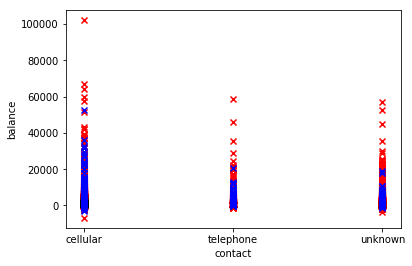

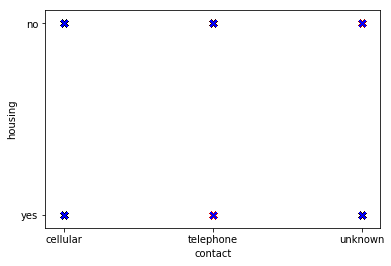

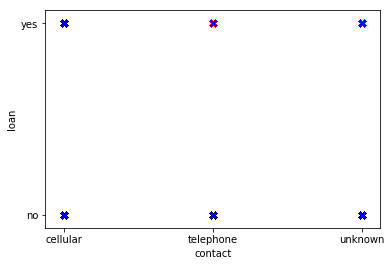

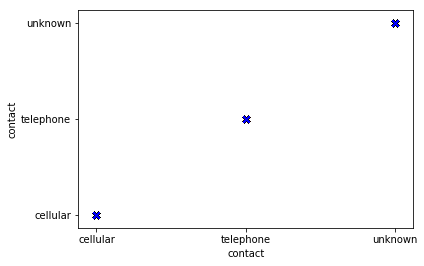

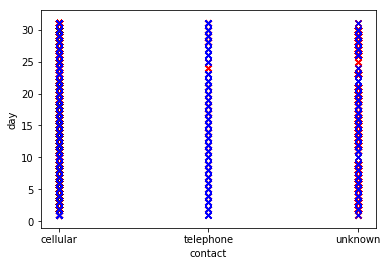

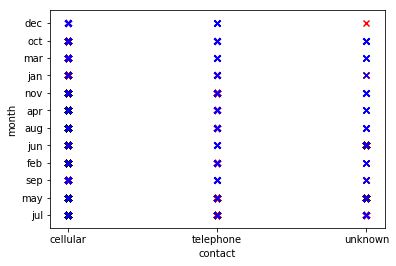

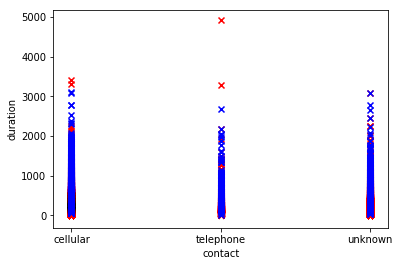

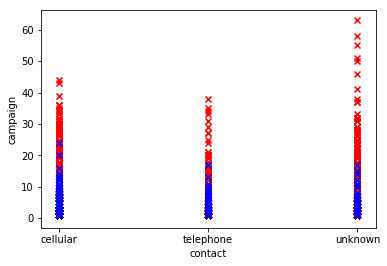

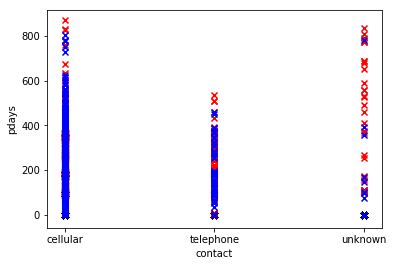

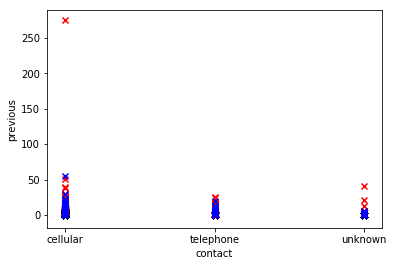

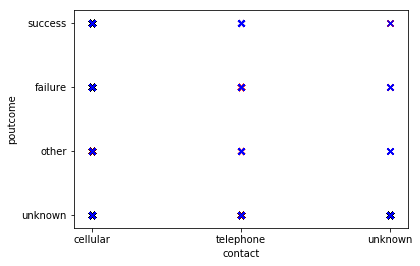

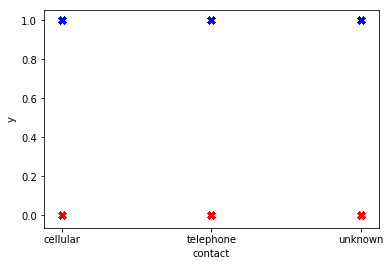

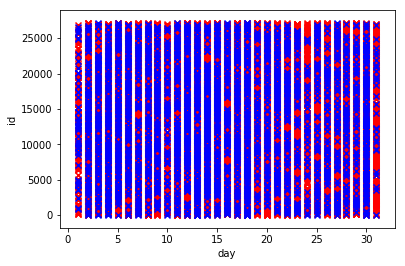

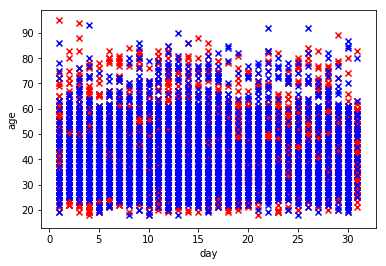

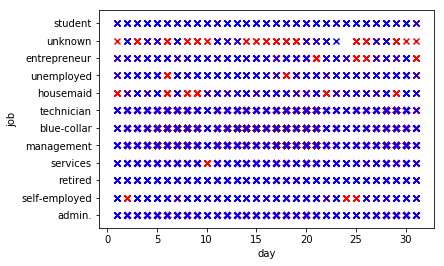

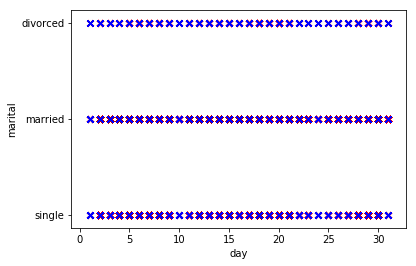

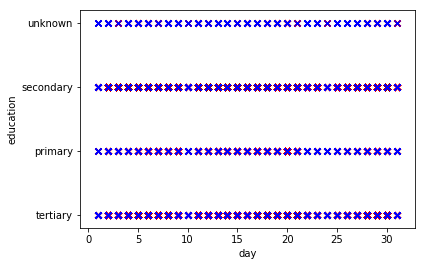

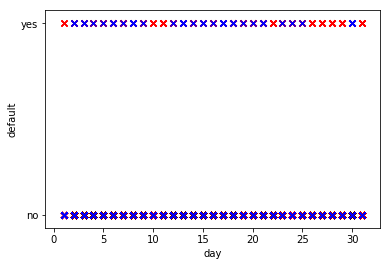

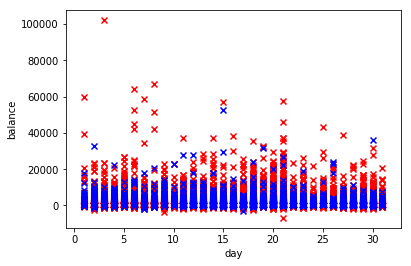

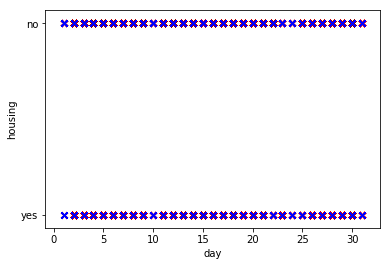

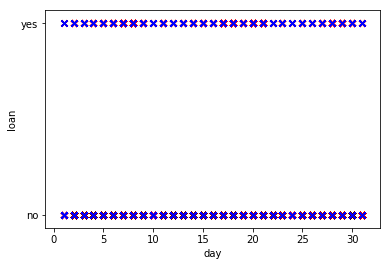

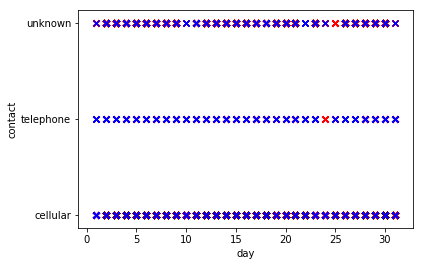

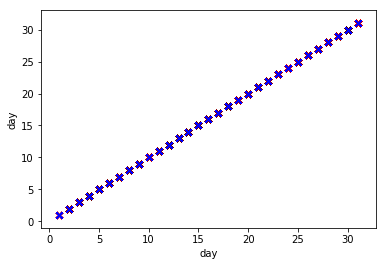

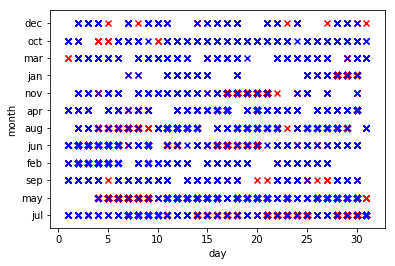

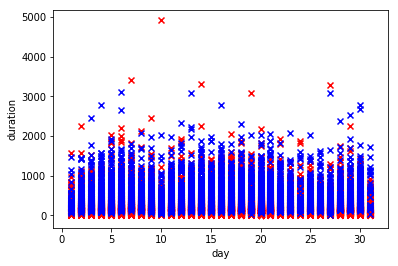

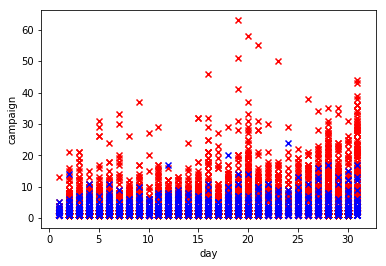

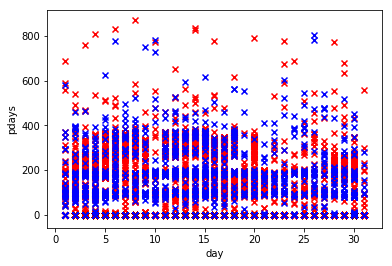

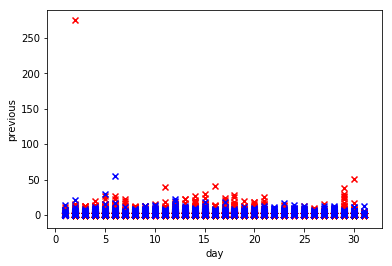

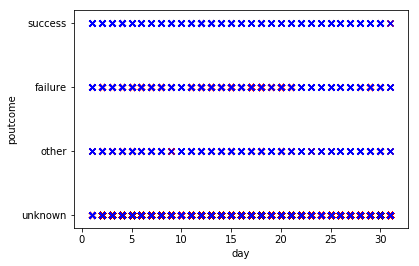

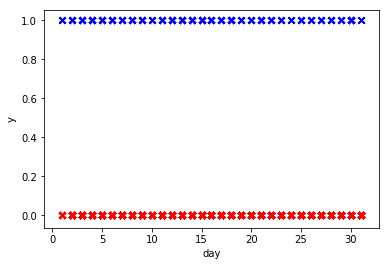

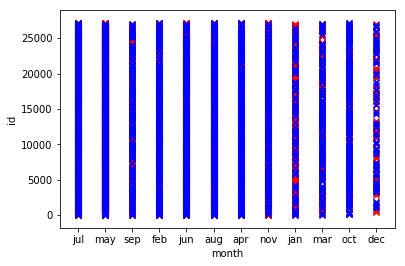

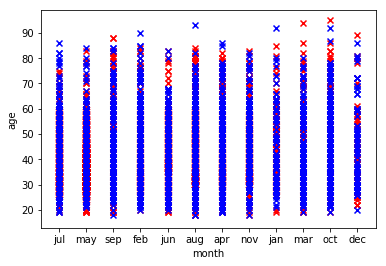

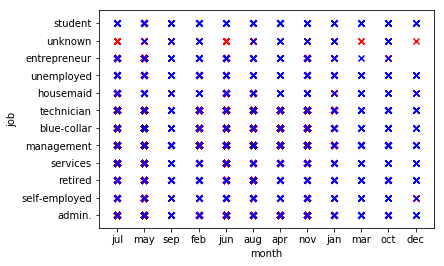

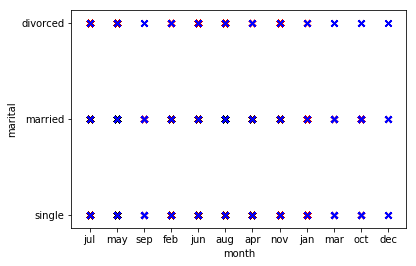

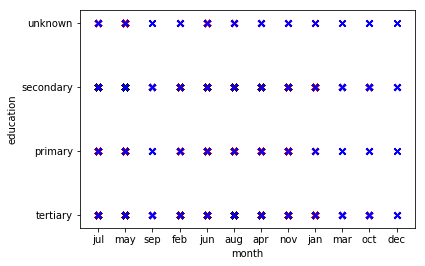

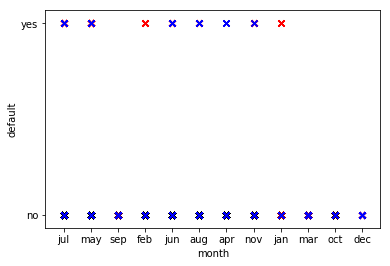

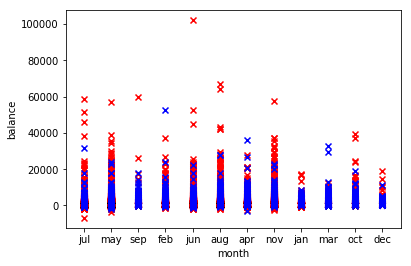

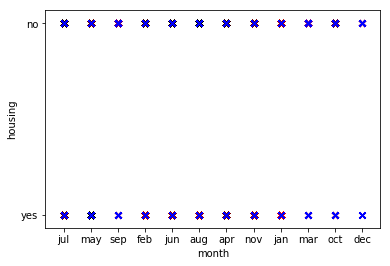

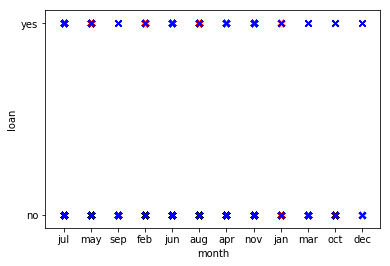

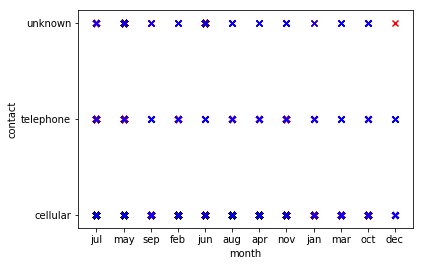

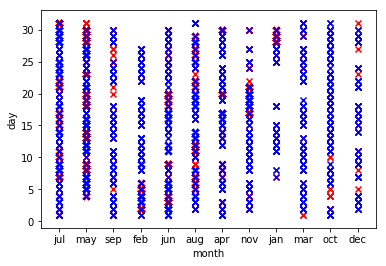

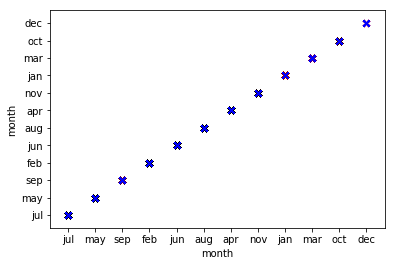

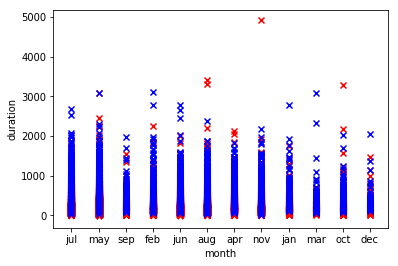

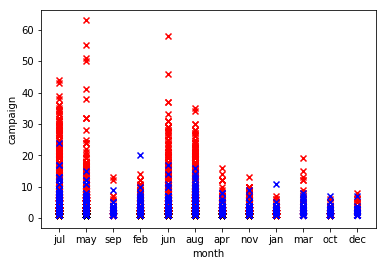

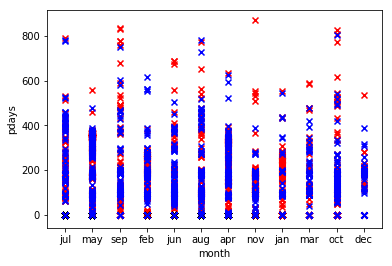

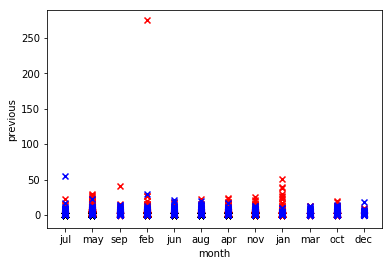

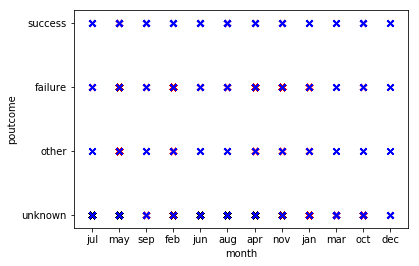

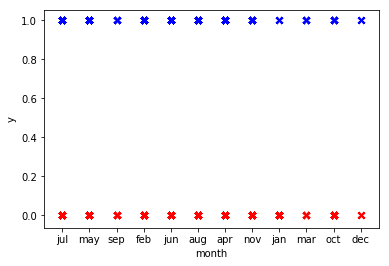

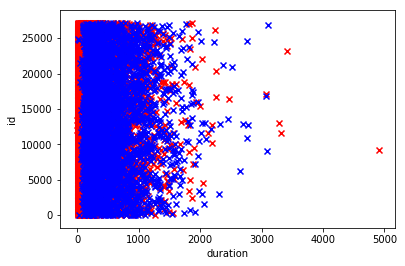

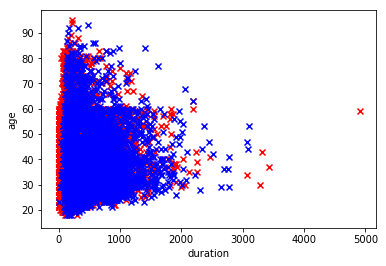

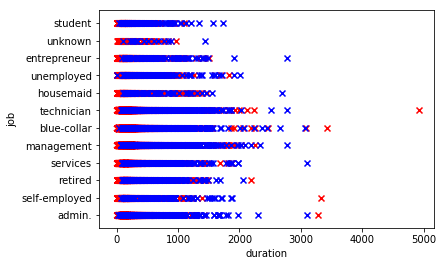

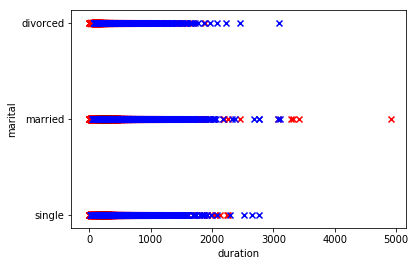

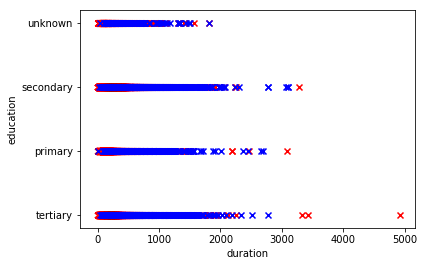

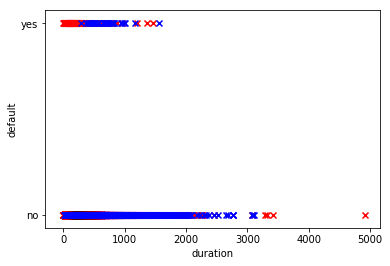

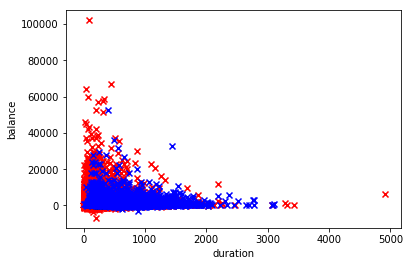

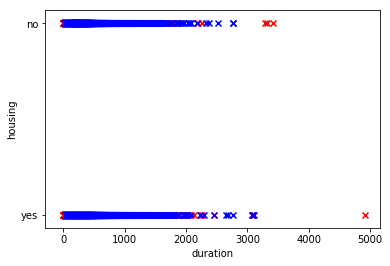

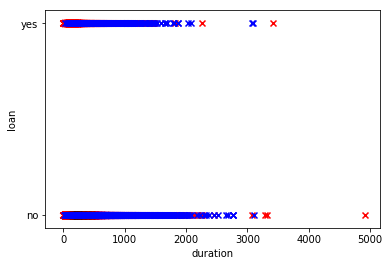

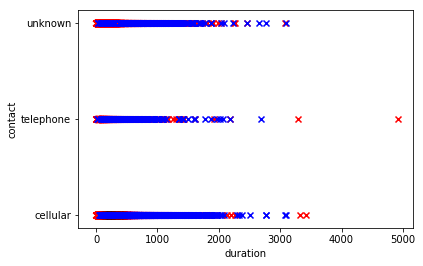

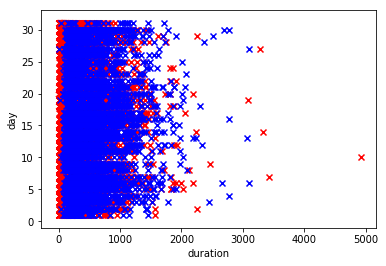

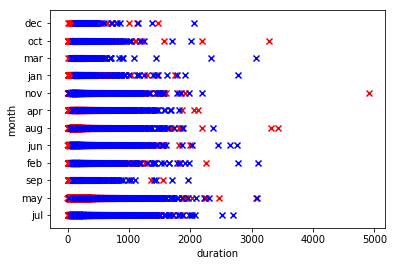

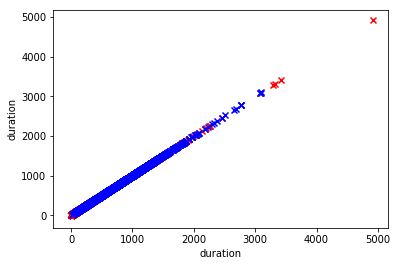

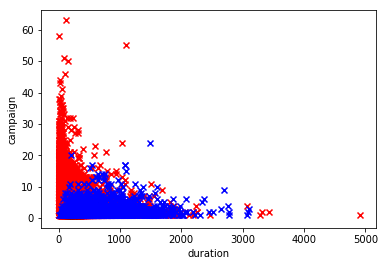

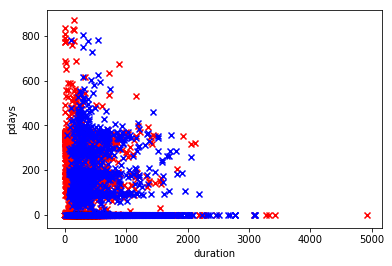

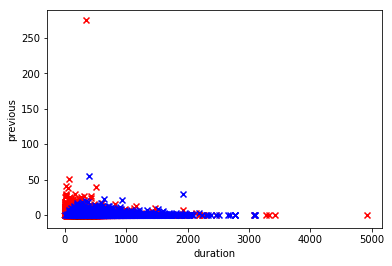

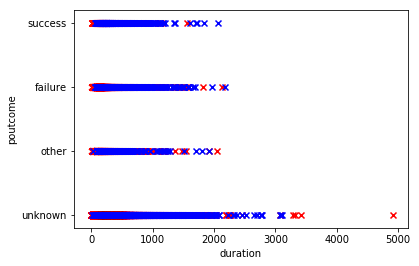

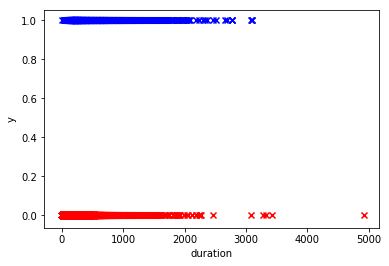

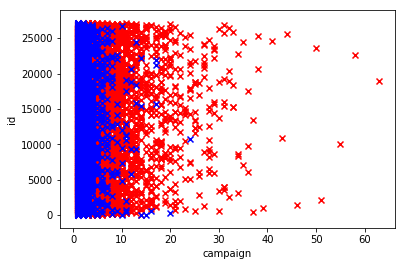

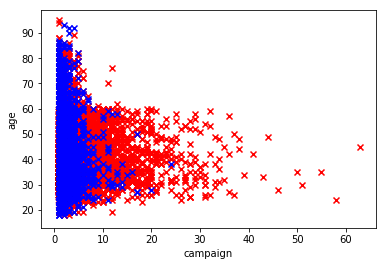

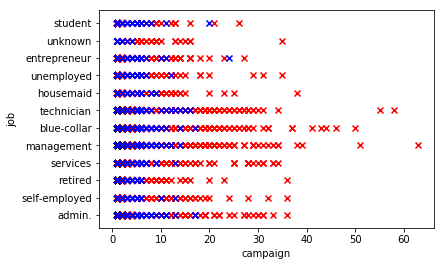

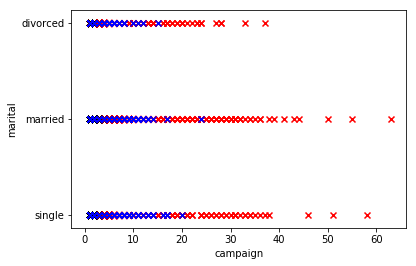

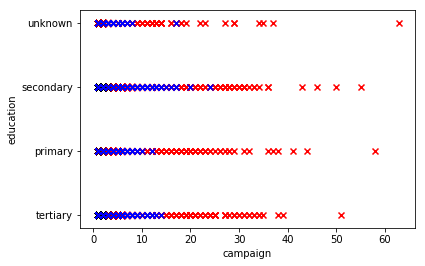

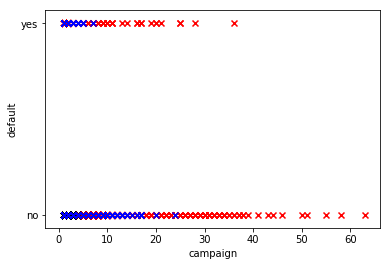

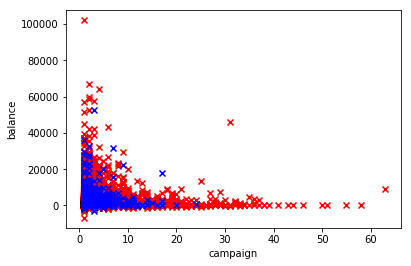

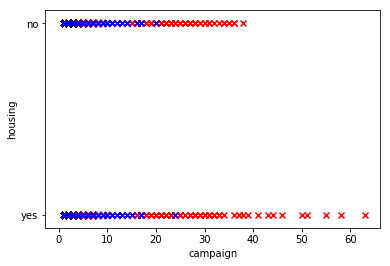

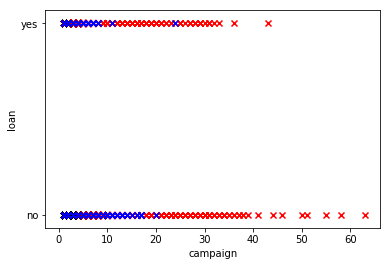

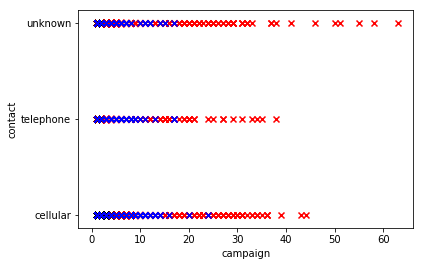

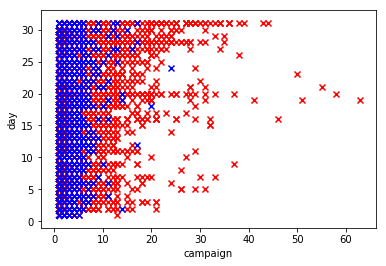

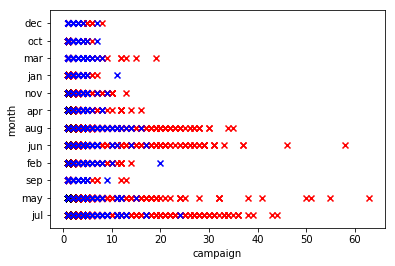

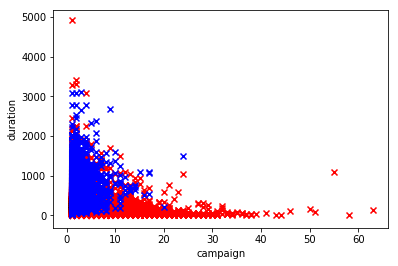

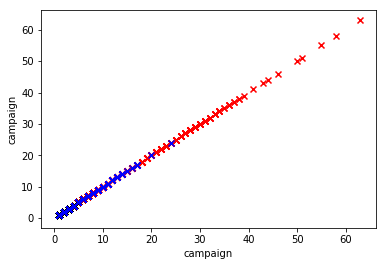

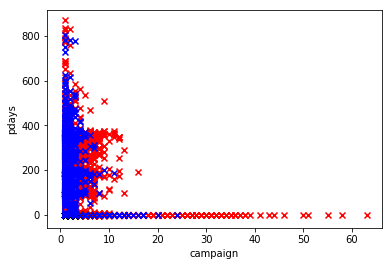

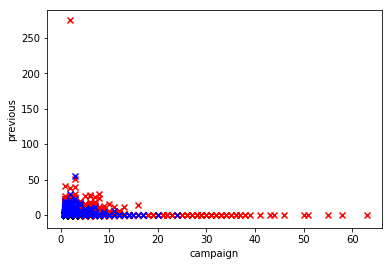

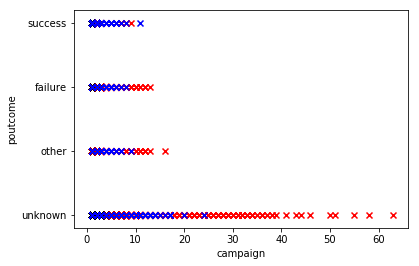

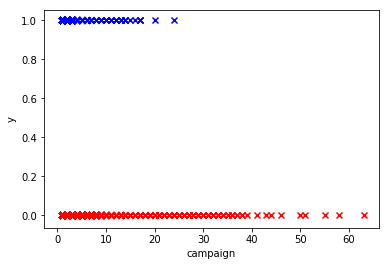

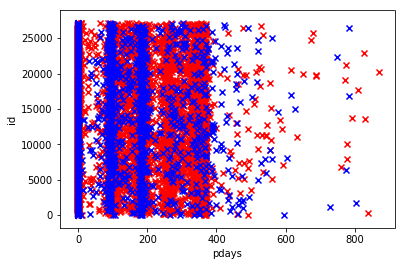

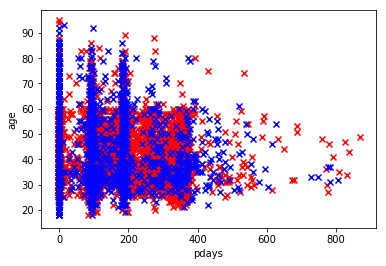

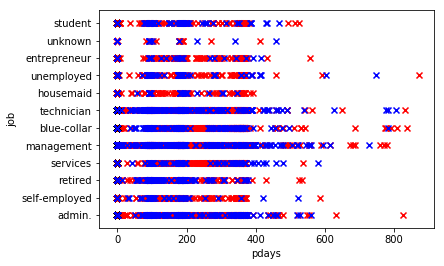

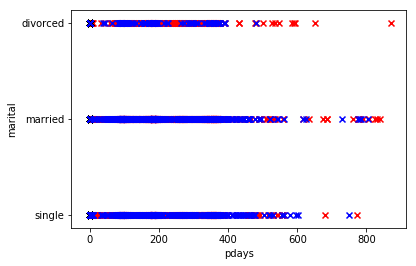

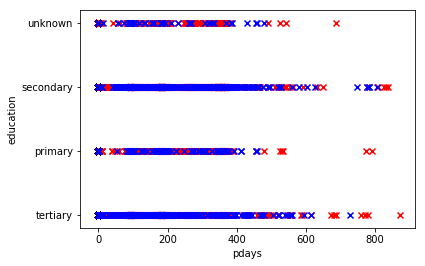

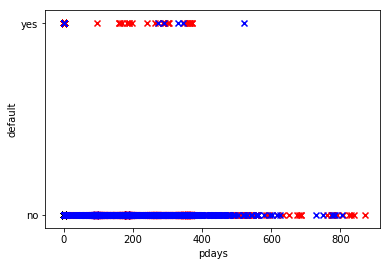

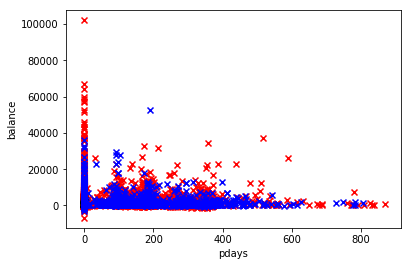

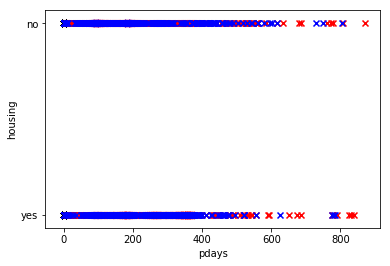

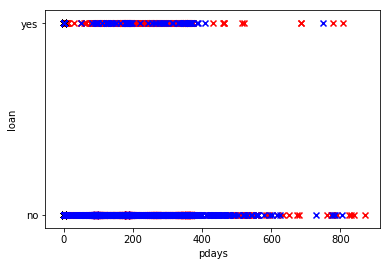

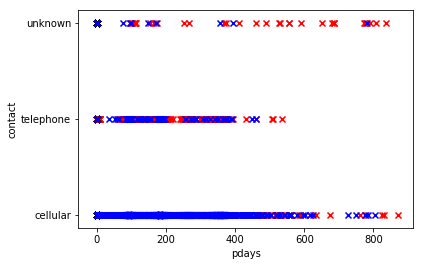

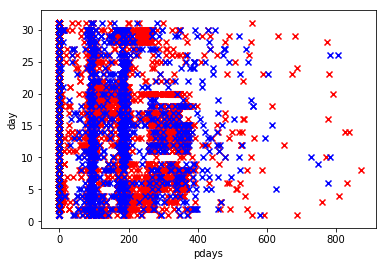

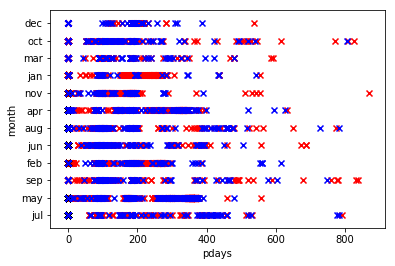

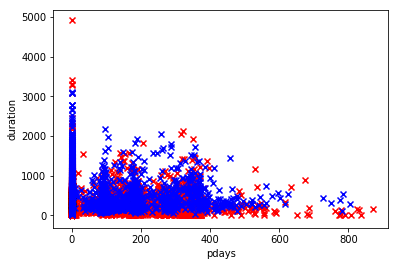

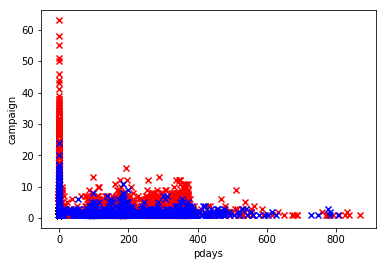

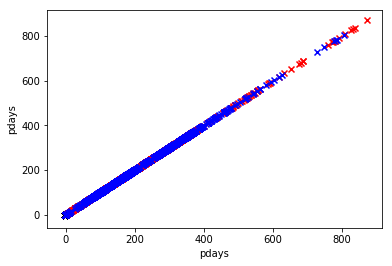

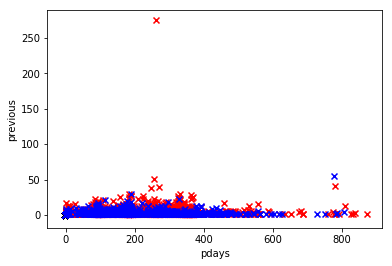

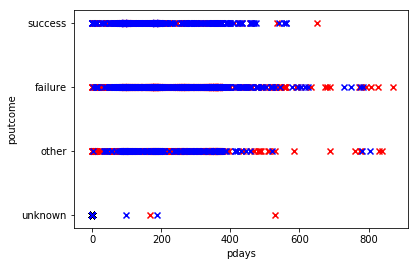

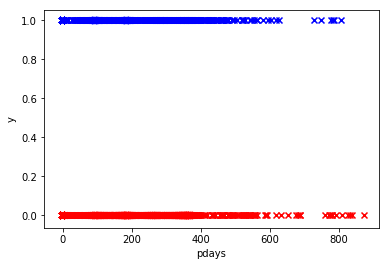

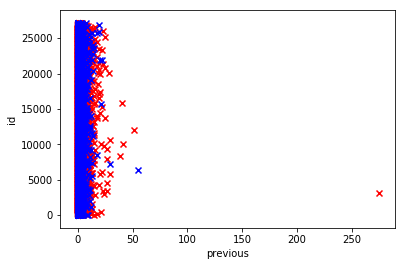

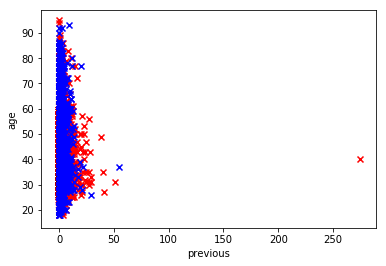

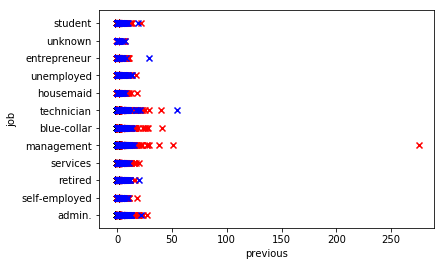

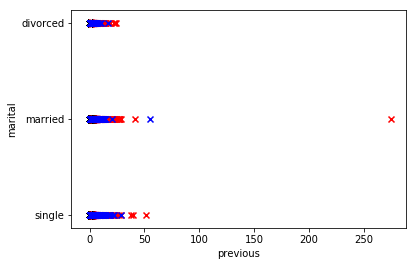

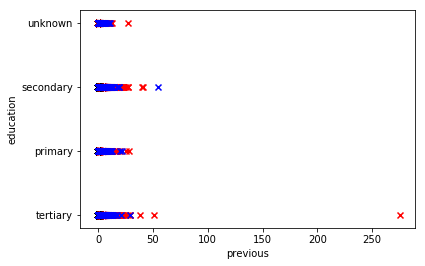

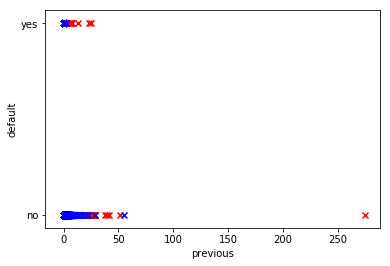

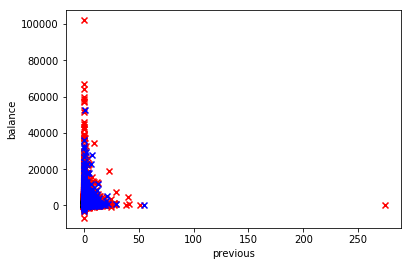

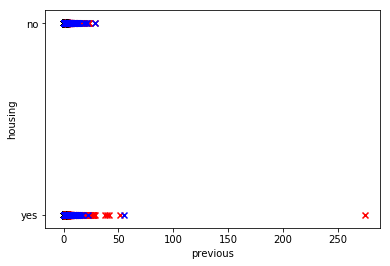

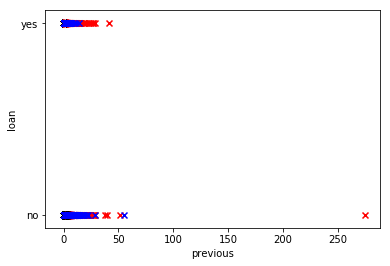

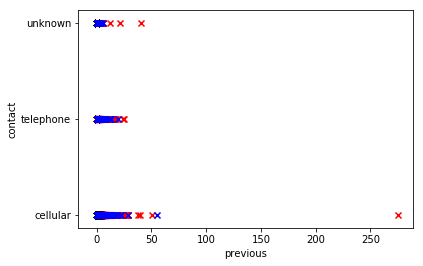

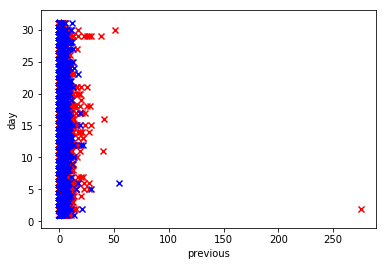

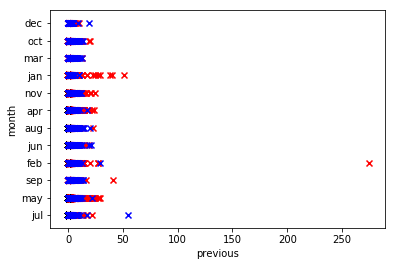

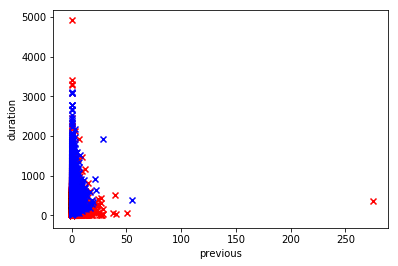

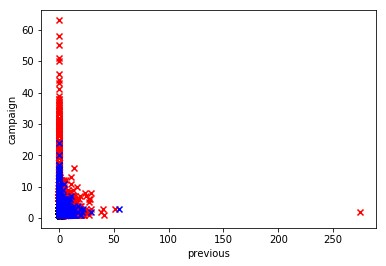

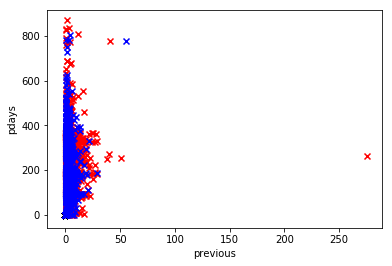

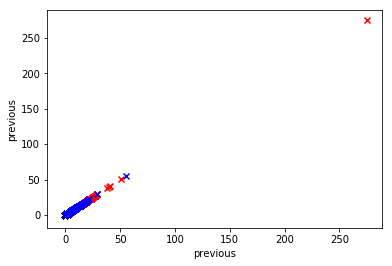

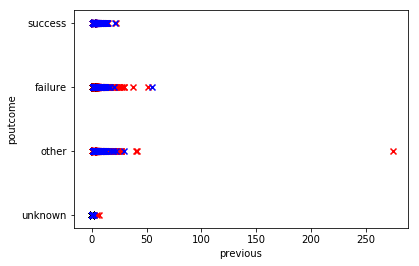

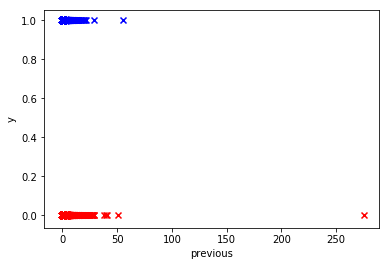

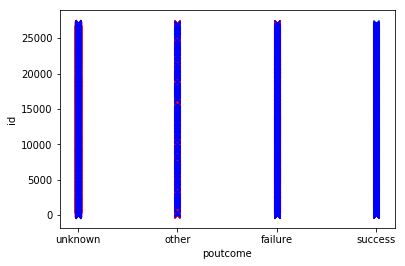

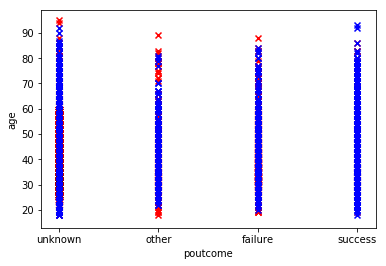

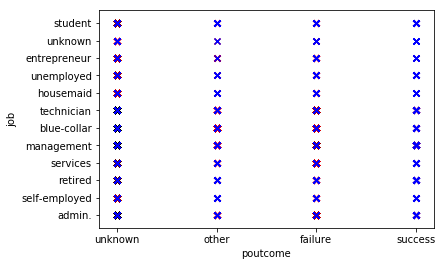

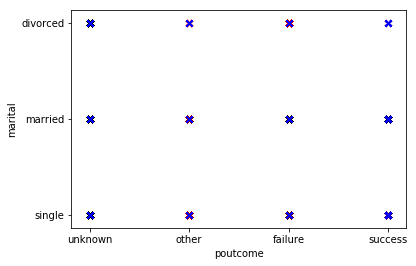

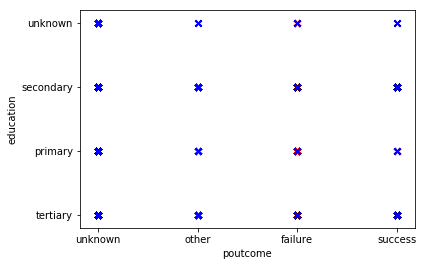

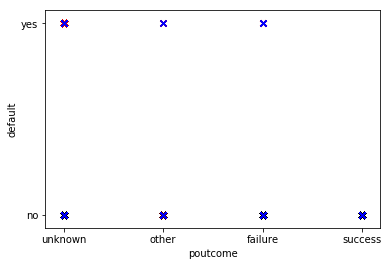

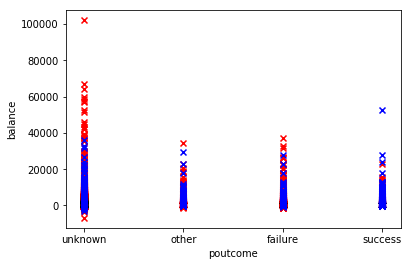

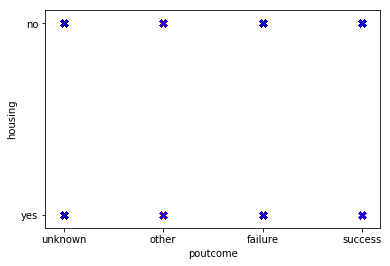

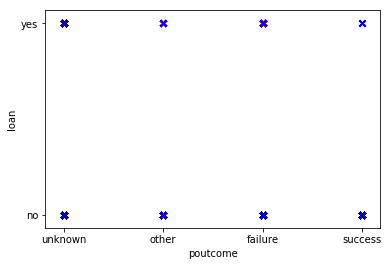

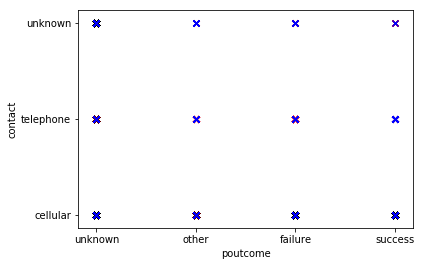

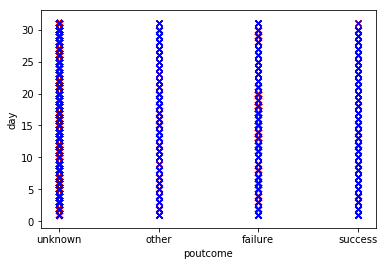

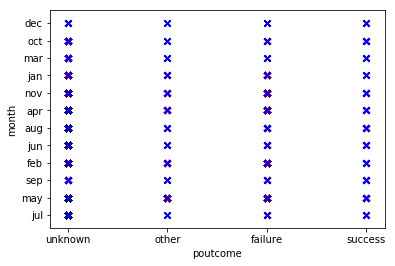

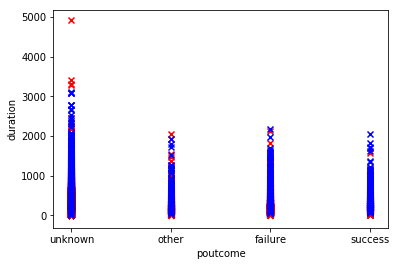

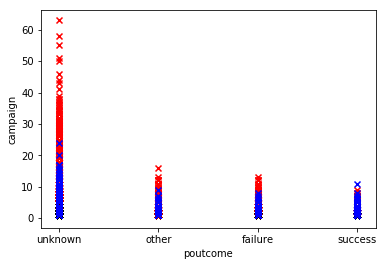

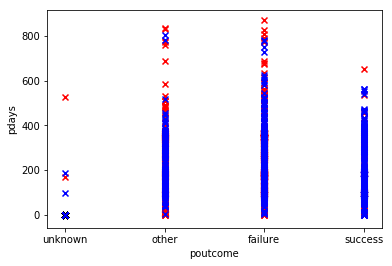

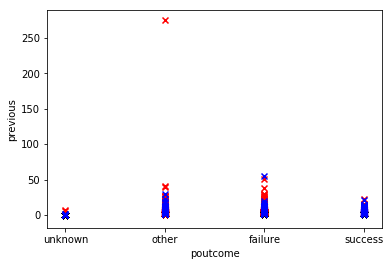

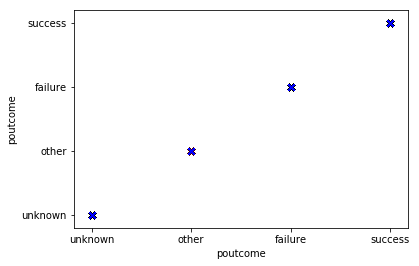

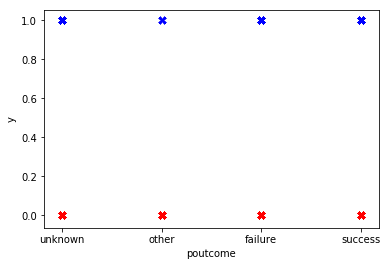

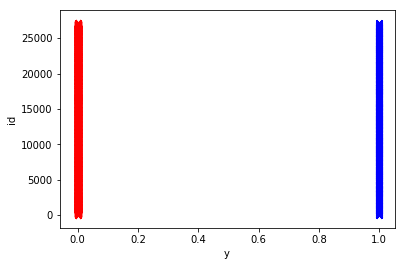

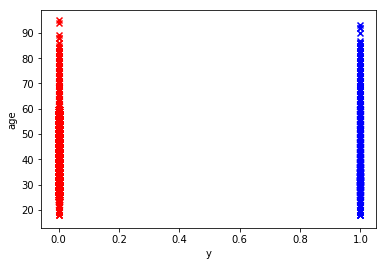

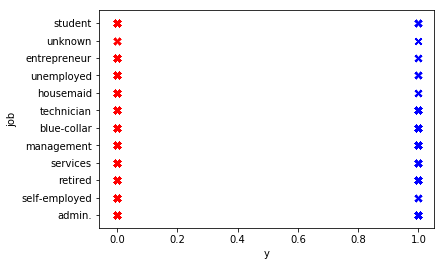

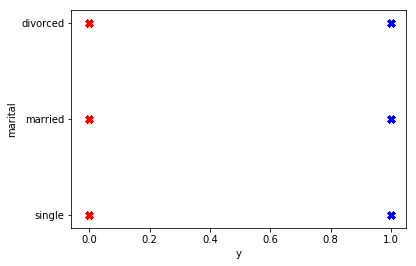

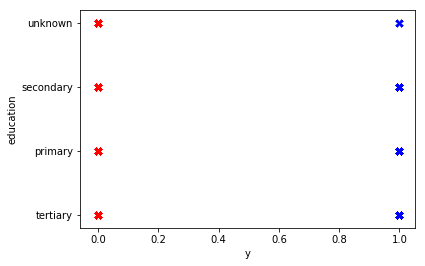

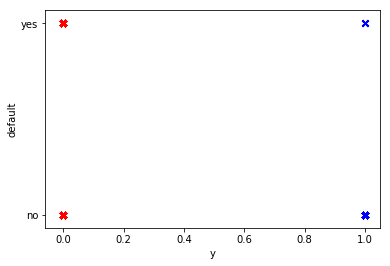

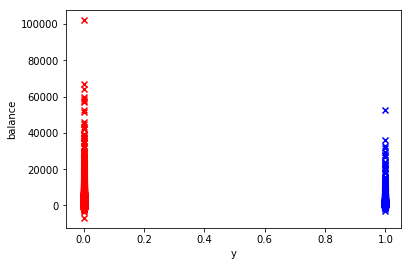

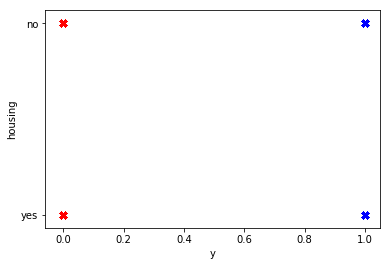

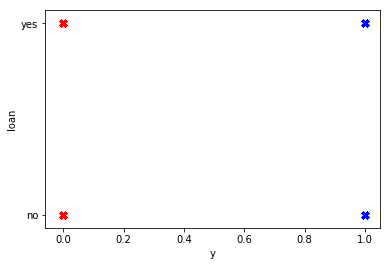

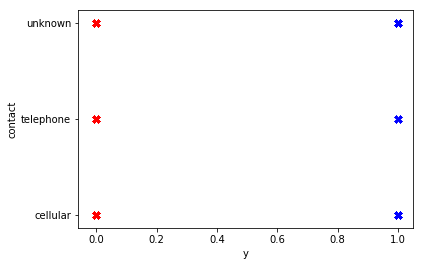

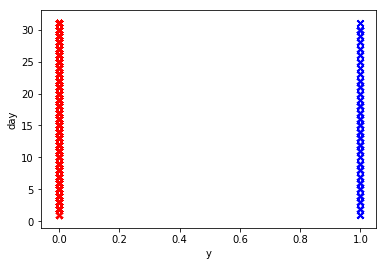

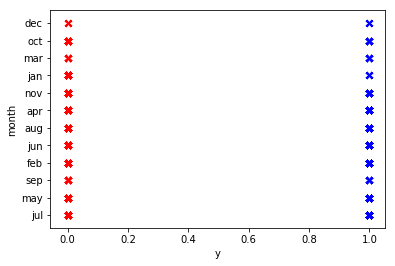

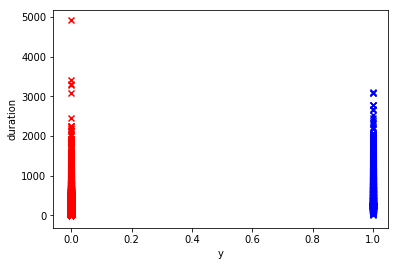

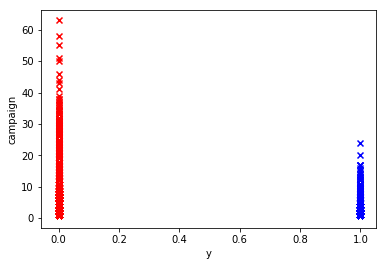

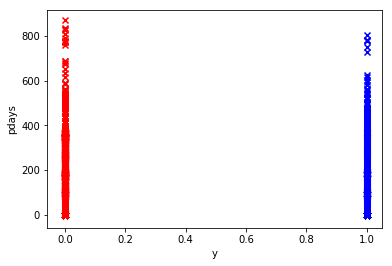

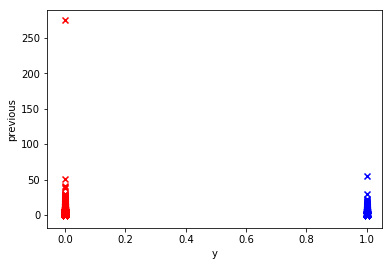

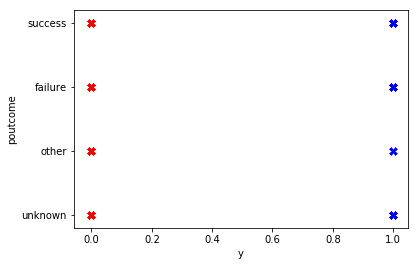

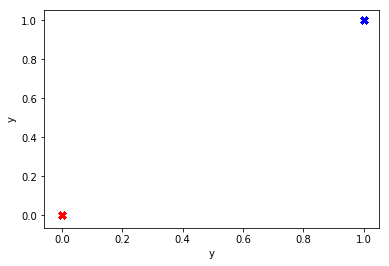

In [125]:
#2つの特徴量を指定した時の散布図
for name1 in data.columns:
    for name2 in data.columns:
        data[data['y'] == 0]
        data[data['y'] == 1]
        plt.scatter(data[data['y'] == 0][str(name1)], data[data['y'] == 0][str(name2)], color='blue', marker='x', label='y=0')
        plt.scatter(data[data['y'] == 1][str(name1)], data[data['y'] == 1][str(name2)], color='red', marker='x', label='y=1')
        plt.xlabel(name1)
        plt.ylabel(name2)
        plt.show()

C:\Users\yuri\Anaconda3\lib\site-packages\matplotlib\__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


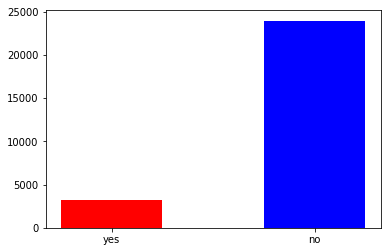

In [4]:
#ｙの分布
plt.bar(left="yes", height=len(data[data["y"] == 1]), width=0.5,color="red")
plt.bar(left="no", height=len(data[data["y"] == 0]), width=0.5,color="blue")

plt.show()

In [5]:
data.mean().loc["y"]

0.1170008846947803

In [7]:
#yes no の棒グラフを作る関数
def yes_no_graph(name):
    data_e = data.loc[:,[name]]
    data_y = data.iloc[:,[17]]
    data_e_y = pd.concat([data_e,data_y], axis=1)
    plt.bar(left="yes", height=data_e_y[data_e_y[name] == "yes"].mean(), width=0.5,color="red")
    plt.bar(left="no", height=data_e_y[data_e_y[name] == "no"].mean(), width=0.5,color="blue")
    plt.show()

C:\Users\yuri\Anaconda3\lib\site-packages\matplotlib\__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


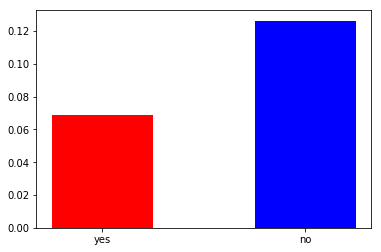

In [8]:
yes_no_graph("loan")
# yes_no_graph("default")
# yes_no_graph("loan")

C:\Users\yuri\Anaconda3\lib\site-packages\matplotlib\__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


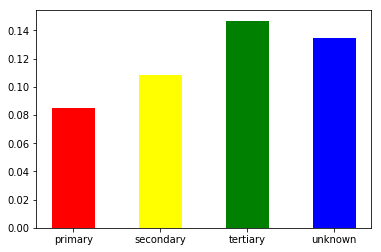

In [97]:
#educationの分布
name="education"
plt.bar(left="primary", height=data_e_y[data_e_y[name] == "primary"].mean(), width=0.5,color="red")
plt.bar(left="secondary", height=data_e_y[data_e_y[name] == "secondary"].mean(), width=0.5,color="yellow")
plt.bar(left="tertiary", height=data_e_y[data_e_y[name] == "tertiary"].mean(), width=0.5,color="green")
plt.bar(left="unknown", height=data_e_y[data_e_y[name] == "unknown"].mean(), width=0.5,color="blue")
plt.show()

C:\Users\yuri\Anaconda3\lib\site-packages\matplotlib\__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


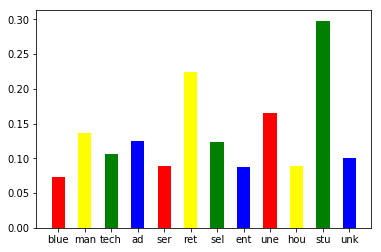

In [108]:
name="job"
plt.bar(left="blue", height=data_e_y[data_e_y[name] == "blue-collar"].mean(), width=0.5,color="red")
plt.bar(left="man", height=data_e_y[data_e_y[name] == "management"].mean(), width=0.5,color="yellow")
plt.bar(left="tech", height=data_e_y[data_e_y[name] == "technician"].mean(), width=0.5,color="green")
plt.bar(left="ad", height=data_e_y[data_e_y[name] == "admin."].mean(), width=0.5,color="blue")
plt.bar(left="ser", height=data_e_y[data_e_y[name] == "services"].mean(), width=0.5,color="red")
plt.bar(left="ret", height=data_e_y[data_e_y[name] == "retired"].mean(), width=0.5,color="yellow")
plt.bar(left="sel", height=data_e_y[data_e_y[name] == "self-employed"].mean(), width=0.5,color="green")
plt.bar(left="ent", height=data_e_y[data_e_y[name] == "entrepreneur"].mean(), width=0.5,color="blue")
plt.bar(left="une", height=data_e_y[data_e_y[name] == "unemployed"].mean(), width=0.5,color="red")
plt.bar(left="hou", height=data_e_y[data_e_y[name] == "housemaid"].mean(), width=0.5,color="yellow")
plt.bar(left="stu", height=data_e_y[data_e_y[name] == "student"].mean(), width=0.5,color="green")
plt.bar(left="unk", height=data_e_y[data_e_y[name] == "unknown"].mean(), width=0.5,color="blue")
plt.show()

    

C:\Users\yuri\Anaconda3\lib\site-packages\matplotlib\__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


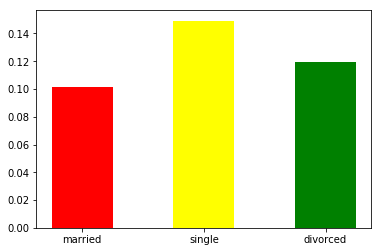

In [111]:
name="marital"
plt.bar(left="married", height=data_e_y[data_e_y[name] == "married"].mean(), width=0.5,color="red")
plt.bar(left="single", height=data_e_y[data_e_y[name] == "single"].mean(), width=0.5,color="yellow")
plt.bar(left="divorced", height=data_e_y[data_e_y[name] == "divorced"].mean(), width=0.5,color="green")

plt.show()

C:\Users\yuri\Anaconda3\lib\site-packages\matplotlib\__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


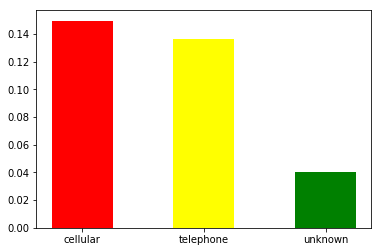

In [115]:
plt.bar(left="cellular", height=data_e_y[data_e_y[name] == "cellular"].mean(), width=0.5,color="red")
plt.bar(left="telephone", height=data_e_y[data_e_y[name] == "telephone"].mean(), width=0.5,color="yellow")
plt.bar(left="unknown", height=data_e_y[data_e_y[name] == "unknown"].mean(), width=0.5,color="green")

plt.show()

C:\Users\yuri\Anaconda3\lib\site-packages\matplotlib\__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


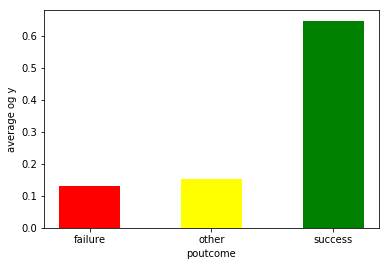

In [122]:
plt.bar(left="failure", height=data_e_y[data_e_y[name] == "failure"].mean(), width=0.5,color="red")
plt.bar(left="other", height=data_e_y[data_e_y[name] == "other"].mean(), width=0.5,color="yellow")
plt.bar(left="success", height=data_e_y[data_e_y[name] == "success"].mean(), width=0.5,color="green")
plt.xlabel("poutcome")
plt.ylabel("average og y")

plt.show()

columnで分けてrateのグラフを出力する関数

In [9]:
def rate_graph_column(name,data): #name:name of column  data:name of data
    counter=1
    if name == "job":
        columns=[]
        for i in data.loc[:,name]:
            if i not in columns:
                columns.append(i)
        print(columns)
        fig, ax1 = plt.subplots(figsize=(10,8))

        y=[]


        for i in columns:
            ax1.bar(x=i[:4], height=len(data[(data[name] == i)&(data["y"]==0)]), width=0.5,color="blue",label="y rate")
            ax1.bar(x=i[:4], height=-len(data[(data[name] == i)&(data["y"]==1)]), width=0.5,color="red")
            y.append(data[data[name] == i].mean().loc["y"])
            if counter==1:
                ax2=ax1.twinx()

                ax1.legend()
                ax2.legend()
                counter += 1


        

        ax2.plot(y, label = 'rate')

        #描画の調整
        plt.title(name)
        plt.rcParams['font.size'] = 12
        ax1.set_ylabel("The number of people")
        ax2.set_ylabel("The average of y")



        ax1.set_xlabel(name)
        plt.legend(loc='lower right')

        plt.show()
    else:
        columns=[]
        for i in data.loc[:,name]:
            if i not in columns:
                columns.append(i)
        print(columns)
        fig, ax1 = plt.subplots(figsize=(10,8))

        y=[]


        for i in columns:
            ax1.bar(x=i, height=len(data[(data[name] == i)&(data["y"]==0)]), width=0.5,color="blue",label="y=0")
            ax1.bar(x=i, height=-len(data[(data[name] == i)&(data["y"]==1)]), width=0.5,color="red",label="y=1")
            y.append(data[data[name] == i].mean().loc["y"])
            if counter==1:
                ax2=ax1.twinx()

                ax1.legend()
                ax2.legend()
                counter += 1


        


        ax2.plot(y, label = 'rate')

        #描画の調整
        plt.title(name)
        plt.rcParams['font.size'] = 12
        ax1.set_ylabel("The number of people")
        ax2.set_ylabel("The average of y")



        ax1.set_xlabel(name)
        plt.legend(loc='lower right')

        plt.show()




['secondary', 'primary', 'tertiary', 'unknown']


No handles with labels found to put in legend.


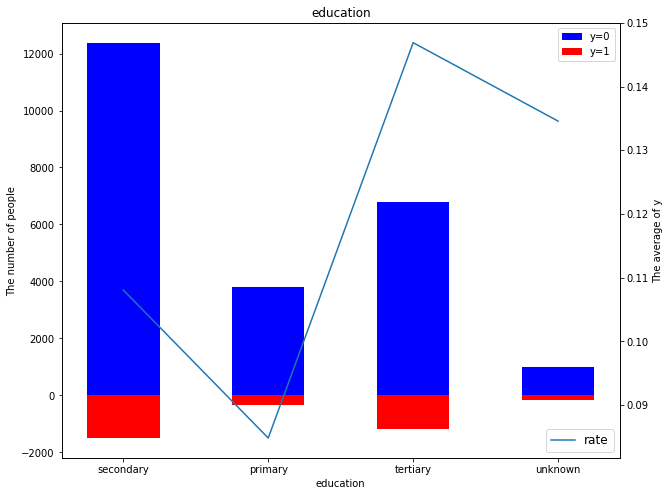

In [10]:
rate_graph_column("education",data)

In [13]:
#適当な値で区切ってグループ分けする（15から10刻みでわけるなど）
def rate_graph_figure(name,data,initial, interval): #name:name of column  data:name of data
    counter=1
    fig, ax1 = plt.subplots(figsize=(10,8))
    x=[]
    y=[]
    a=initial
    while a <= data[name].max():
        b=a+interval
    
        
        ax1.bar(x=(a+b)/2, height=len(data[(data[name] >= a) & (data[name] < b)&(data["y"]==0)]), width=interval*0.9,color="blue",label="y=0")
        ax1.bar(x=(a+b)/2, height=-len(data[(data[name] >= a) & (data[name] < b)&(data["y"]==1)]), width=interval*0.9,color="red",label="y=0")
#         print(len(data[(data[name] >= a) & (data[name] < b)]))
#         print(len(data[(data[name] >= a) & (data[name] < b)&(data["y"]==1)]))
                       
        y.append(data[(data[name] >= a )&(data[name] < b)].mean().loc["y"])
        x.append((a+b)/2)
        a = b
        if counter==1:
            ax2=ax1.twinx()

            ax1.legend()
            ax2.legend()
            counter += 1


    
    ax2.plot(x,y, label = 'rate')

    #描画の調整
    plt.title(name)
    plt.rcParams['font.size'] = 12
    ax1.set_ylabel("The number of people")
    ax2.set_ylabel("The average of y")



    ax1.set_xlabel(name)
    plt.legend(loc='lower right')

    plt.show()
    #print(y)


In [14]:
tables = {
    "id":0,
    "idi":1,
    "age":15,
    "agei":5,
    "balance":-7000,
    "balancei":4000,
    "campaign":1,
    "campaigni":10,
    "pdays":-100,
    "pdaysi":100,
    "previous":0,
    "previousi":10,
    "y":0,
    "yi":1,
    "month_day":1,
    "month_dayi":40,
    "duration":0,
    "durationi":1000,
    "day":1,
    "dayi":10
}

No handles with labels found to put in legend.


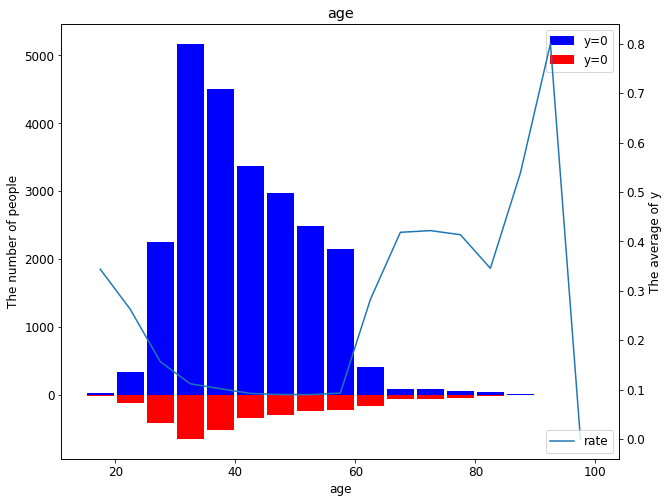

['blue-collar', 'entrepreneur', 'management', 'retired', 'services', 'technician', 'admin.', 'self-employed', 'housemaid', 'unemployed', 'unknown', 'student']


No handles with labels found to put in legend.


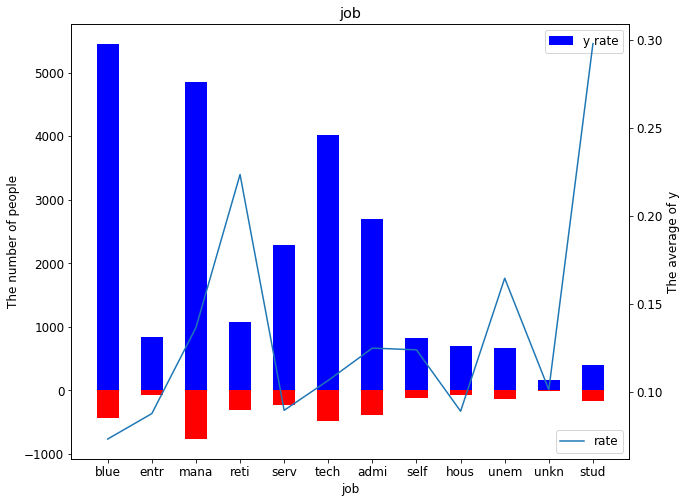

['married', 'single', 'divorced']


No handles with labels found to put in legend.


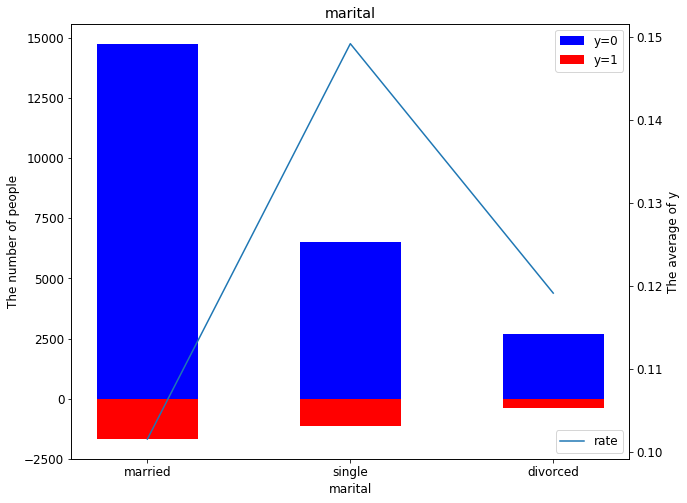

['secondary', 'primary', 'tertiary', 'unknown']


No handles with labels found to put in legend.


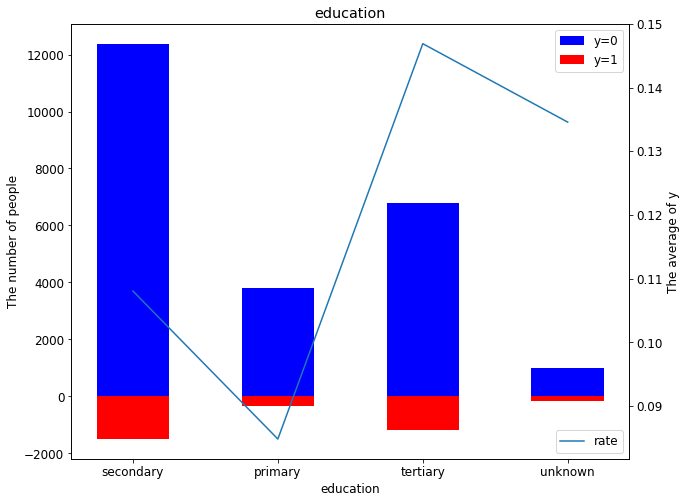

['no', 'yes']


No handles with labels found to put in legend.


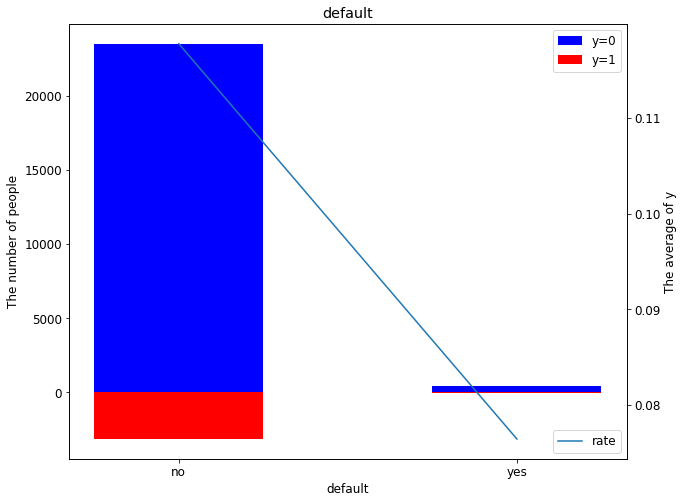

No handles with labels found to put in legend.


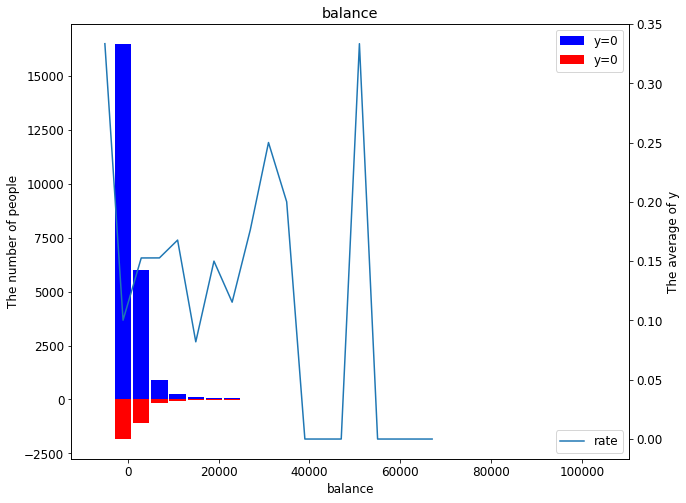

['yes', 'no']


No handles with labels found to put in legend.


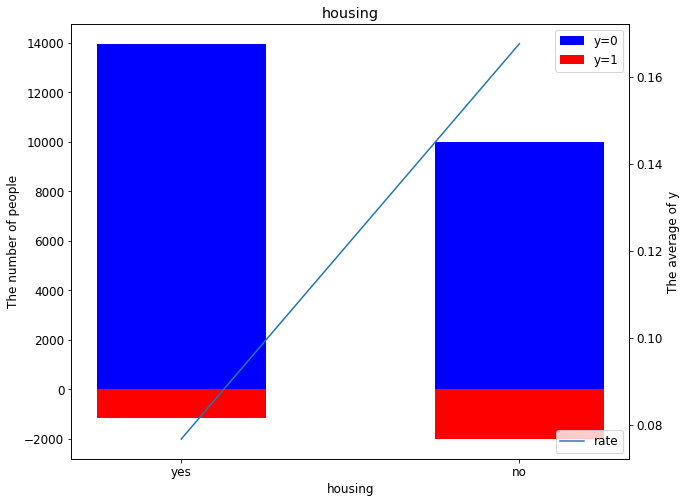

['no', 'yes']


No handles with labels found to put in legend.


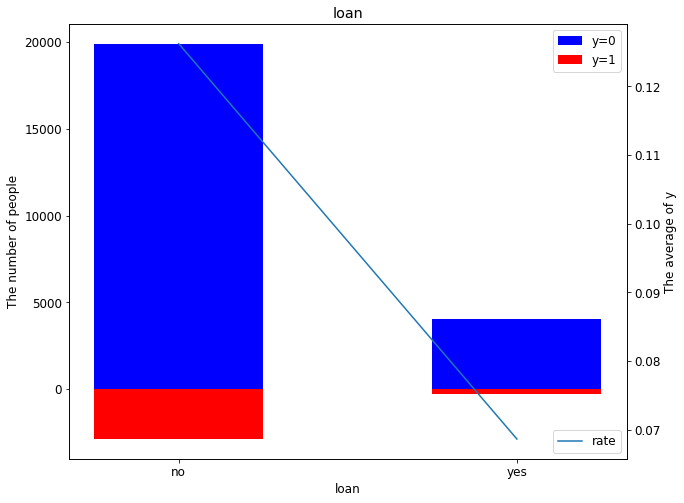

['cellular', 'unknown', 'telephone']


No handles with labels found to put in legend.


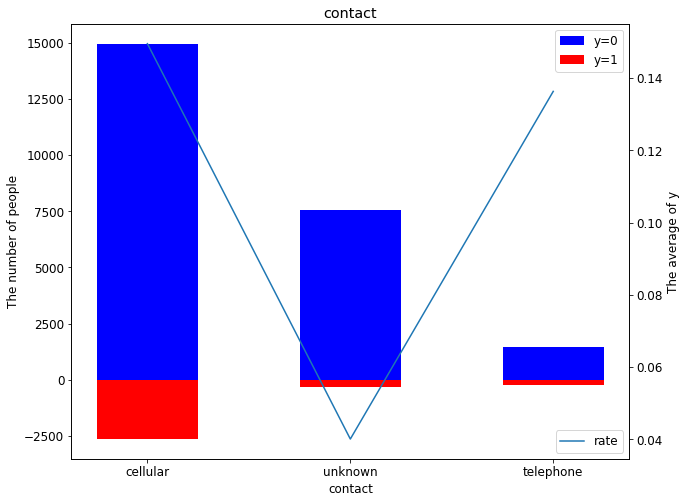

No handles with labels found to put in legend.


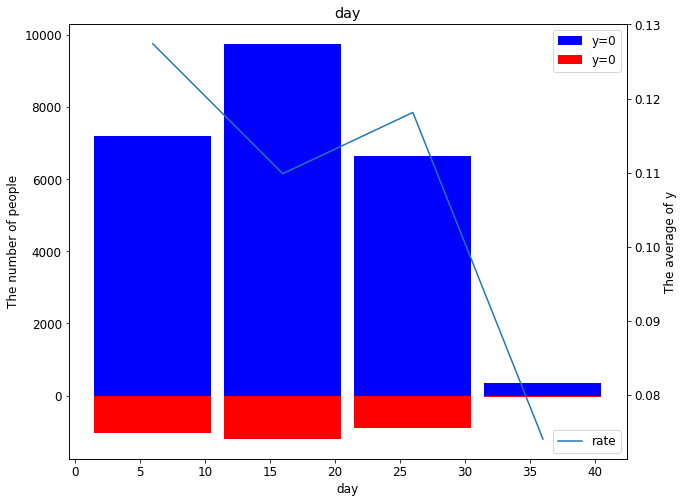

No handles with labels found to put in legend.


['apr', 'feb', 'jan', 'jun', 'sep', 'may', 'aug', 'mar', 'jul', 'nov', 'oct', 'dec']


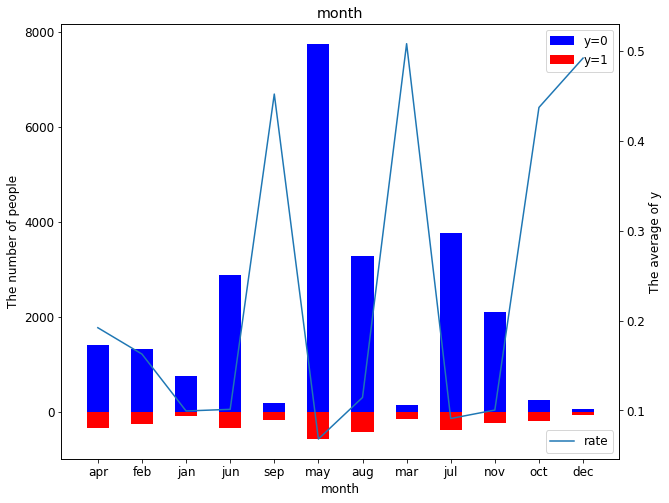

No handles with labels found to put in legend.


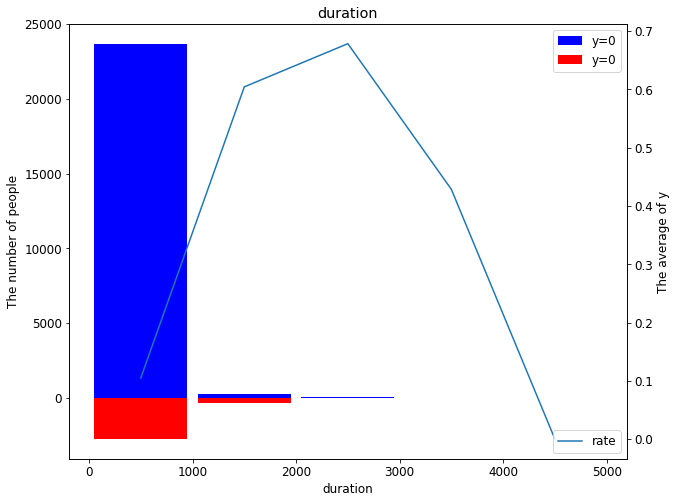

No handles with labels found to put in legend.


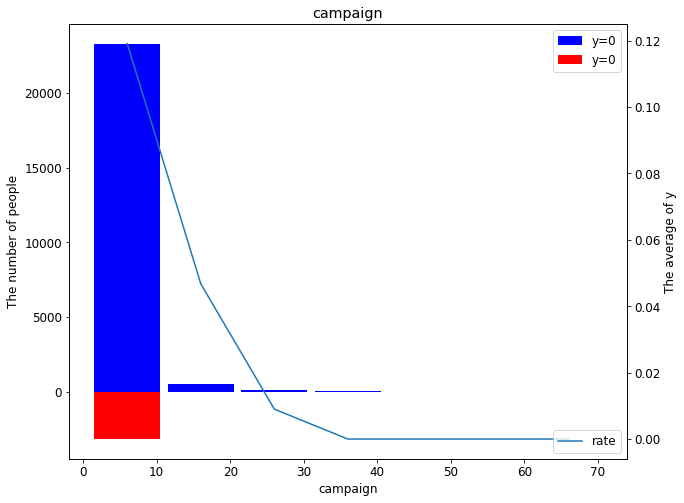

No handles with labels found to put in legend.


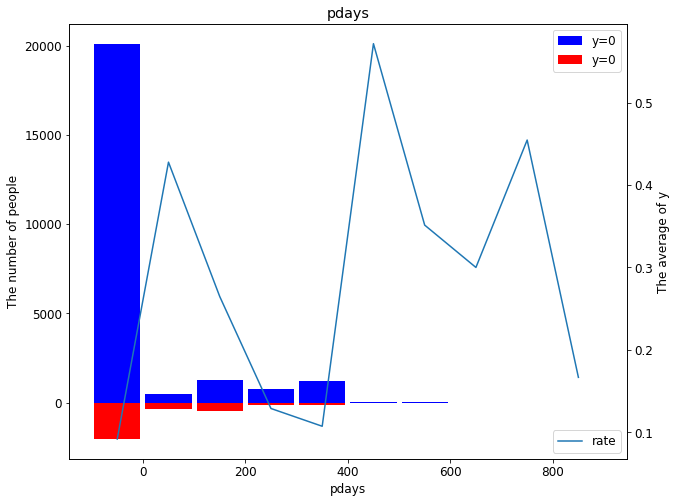

No handles with labels found to put in legend.


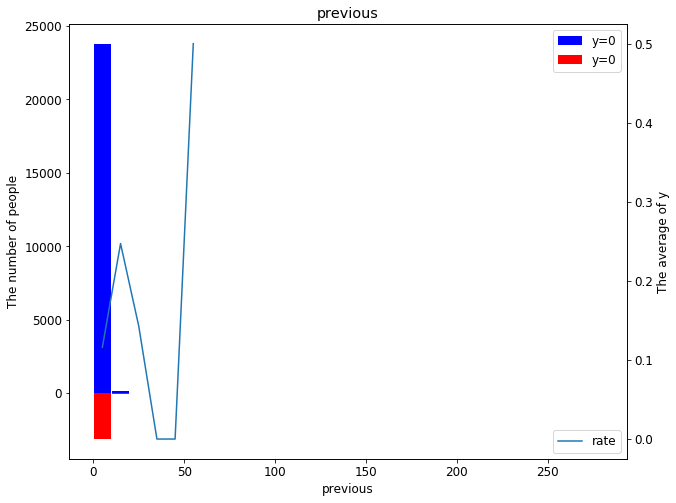

['unknown', 'failure', 'success', 'other']


No handles with labels found to put in legend.


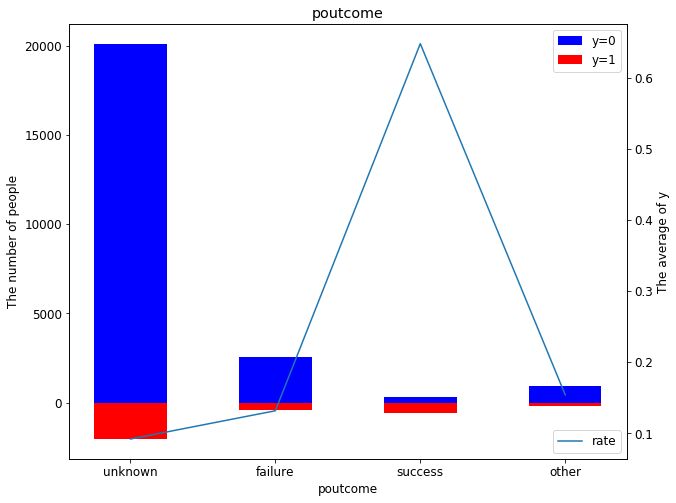

No handles with labels found to put in legend.


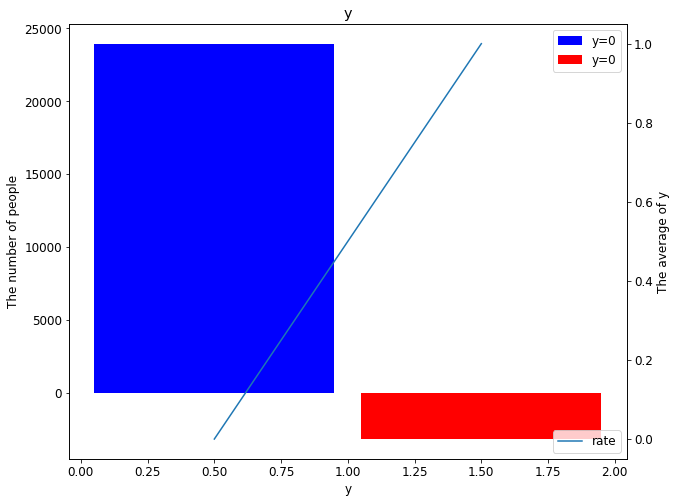

In [15]:
#まとめてグラフを出力
for i in data.columns:
    if  data.dtypes[i] == "object":
        
        rate_graph_column(i,data)
    elif i != 'id':
        initial = tables[i]

        name3=i+"i"
        interval = tables[name3]
#         print(i)
#         print(initial)
#         print(interval)
        rate_graph_figure(i,data,initial, interval)
        
    